# 10 minutes to pandas

In [3]:
# First import the library
import numpy as np
import pandas as pd

In [4]:
# object creation
# Series
s = pd.Series([1, 3, 5, 7, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    7.0
4    NaN
5    6.0
6    8.0
dtype: float64

In [5]:
# creating Dataframe
dates = pd.date_range('20190101', periods=6)
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384
2019-01-04,0.041960,-0.428040,-0.293424,0.151043
2019-01-05,0.145008,0.313927,0.589404,1.592931
2019-01-06,-1.562379,0.174341,0.141665,0.557065


In [7]:
# creating Dataframe by passing dict. of object
df2 = pd.DataFrame({'A': 1., 
                    'B': pd.Timestamp('20130102'), 
                'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [22]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


# Viewing Data

In [9]:
df.head()

,A,B,C,D
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384
2019-01-04,0.041960,-0.428040,-0.293424,0.151043
2019-01-05,0.145008,0.313927,0.589404,1.592931


In [10]:
df.tail()

,A,B,C,D
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384
2019-01-04,0.041960,-0.428040,-0.293424,0.151043
2019-01-05,0.145008,0.313927,0.589404,1.592931
2019-01-06,-1.562379,0.174341,0.141665,0.557065


In [11]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
df.to_numpy()

array([[-1.01215126, -0.54051492, -1.38054802,  0.66139936],
       [-0.21409555, -0.89573683,  1.10701463, -0.07159394],
       [-1.54311927, -0.79979352, -2.66459501, -1.76138443],
       [ 0.04195978, -0.42803961, -0.29342394,  0.15104278],
       [ 0.14500788,  0.31392749,  0.58940351,  1.59293063],
       [-1.56237917,  0.17434136,  0.14166535,  0.55706535]])

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [15]:
# describe shows a quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.690796,-0.362636,-0.416747,0.188243
std,0.781297,0.501459,1.388737,1.113822
min,-1.562379,-0.895737,-2.664595,-1.761384
25%,-1.410377,-0.734974,-1.108767,-0.015935
50%,-0.613123,-0.484277,-0.075879,0.354054
75%,-0.022054,0.023746,0.477469,0.635316
max,0.145008,0.313927,1.107015,1.592931


In [16]:
# transposing data
df.T

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06
A,-1.012151,-0.214096,-1.543119,0.041960,0.145008,-1.562379
B,-0.540515,-0.895737,-0.799794,-0.428040,0.313927,0.174341
C,-1.380548,1.107015,-2.664595,-0.293424,0.589404,0.141665
D,0.661399,-0.071594,-1.761384,0.151043,1.592931,0.557065


In [17]:
# sorting by axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2019-01-01,0.661399,-1.380548,-0.540515,-1.012151
2019-01-02,-0.071594,1.107015,-0.895737,-0.214096
2019-01-03,-1.761384,-2.664595,-0.799794,-1.543119
2019-01-04,0.151043,-0.293424,-0.428040,0.041960
2019-01-05,1.592931,0.589404,0.313927,0.145008
2019-01-06,0.557065,0.141665,0.174341,-1.562379


In [18]:
df.sort_index(ascending=False)

,A,B,C,D
2019-01-06,-1.562379,0.174341,0.141665,0.557065
2019-01-05,0.145008,0.313927,0.589404,1.592931
2019-01-04,0.041960,-0.428040,-0.293424,0.151043
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399


In [19]:
df.sort_values(by='B')

,A,B,C,D
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399
2019-01-04,0.041960,-0.428040,-0.293424,0.151043
2019-01-06,-1.562379,0.174341,0.141665,0.557065
2019-01-05,0.145008,0.313927,0.589404,1.592931


# Selection
Getting by column, index, position or value

In [20]:
# selecting a single column
df['A']

2019-01-01   -1.012151
2019-01-02   -0.214096
2019-01-03   -1.543119
2019-01-04    0.041960
2019-01-05    0.145008
2019-01-06   -1.562379
Freq: D, Name: A, dtype: float64

In [21]:
# selecting via [] which slices the row
df[0:3]

,A,B,C,D
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384


In [22]:
df['20190101':'20190104']

,A,B,C,D
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384
2019-01-04,0.041960,-0.428040,-0.293424,0.151043


# Selection by Label
using loc

In [23]:
df.loc[dates[0]]

A   -1.012151
B   -0.540515
C   -1.380548
D    0.661399
Name: 2019-01-01 00:00:00, dtype: float64

In [24]:
# selting on. multiple axis using label
df.loc[:, ['A', 'D']]

,A,D
2019-01-01,-1.012151,0.661399
2019-01-02,-0.214096,-0.071594
2019-01-03,-1.543119,-1.761384
2019-01-04,0.041960,0.151043
2019-01-05,0.145008,1.592931
2019-01-06,-1.562379,0.557065


In [25]:
df.loc['20190102':'20190104', ['A', 'B']]

,A,B
2019-01-02,-0.214096,-0.895737
2019-01-03,-1.543119,-0.799794
2019-01-04,0.041960,-0.428040


In [26]:
df.loc['20190101']

A   -1.012151
B   -0.540515
C   -1.380548
D    0.661399
Name: 2019-01-01 00:00:00, dtype: float64

In [27]:
# for getting a single or scalar value
df.at[dates[0], 'A']

-1.0121512649074822

# Selection by Position
using index position or number iloc

In [28]:
df.iloc[3:5, 0:2] # this would select dates between the row/index range and columns A,B

,A,B
2019-01-04,0.041960,-0.428040
2019-01-05,0.145008,0.313927


In [29]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2019-01-02,-0.214096,1.107015
2019-01-03,-1.543119,-2.664595
2019-01-05,0.145008,0.589404


In [30]:
# for slicing row explicitly
df.iloc[1:3, :]

,A,B,C,D
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384


In [31]:
# for slicing columns explicitly
df.iloc[:, 1:3]

,B,C
2019-01-01,-0.540515,-1.380548
2019-01-02,-0.895737,1.107015
2019-01-03,-0.799794,-2.664595
2019-01-04,-0.428040,-0.293424
2019-01-05,0.313927,0.589404
2019-01-06,0.174341,0.141665


In [32]:
# for getting a value explicitly
df.iloc[1,1]

-0.8957368291675998

In [33]:
df.iloc[-1, 1]

0.17434135506313864

# Boolean Indexing

In [34]:
# using single column's values to select data
df[df['A']>0]

,A,B,C,D
2019-01-04,0.041960,-0.428040,-0.293424,0.151043
2019-01-05,0.145008,0.313927,0.589404,1.592931


In [35]:
# selecting value from a dataframe when a boolean condition is met
df[df>0]

,A,B,C,D
2019-01-01,NaN,NaN,NaN,0.661399
2019-01-02,NaN,NaN,1.107015,NaN
2019-01-03,NaN,NaN,NaN,NaN
2019-01-04,0.041960,NaN,NaN,0.151043
2019-01-05,0.145008,0.313927,0.589404,1.592931
2019-01-06,NaN,0.174341,0.141665,0.557065


In [36]:
# using the isin() method for filtering
df2 = df.copy()

In [37]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2019-01-01,-1.012151,-0.540515,-1.380548,0.661399,one
2019-01-02,-0.214096,-0.895737,1.107015,-0.071594,one
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384,two
2019-01-04,0.041960,-0.428040,-0.293424,0.151043,three
2019-01-05,0.145008,0.313927,0.589404,1.592931,four
2019-01-06,-1.562379,0.174341,0.141665,0.557065,three


In [38]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2019-01-03,-1.543119,-0.799794,-2.664595,-1.761384,two
2019-01-05,0.145008,0.313927,0.589404,1.592931,four


In [39]:
df2[df2['E']== ['two' || 'four']]

SyntaxError: invalid syntax (<ipython-input-39-084a2fa663cd>, line 1)

# Setting
setting new valuesto columns or rows

In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20190102', periods=6))
s1

2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
2019-01-06    5
2019-01-07    6
Freq: D, dtype: int64

In [41]:
df['F'] = s1  # this literally insert a new columns F in df

In [42]:
# setting values by label
df.at[dates[0], 'A'] = 0

In [43]:
# setting values by position
df.iat[0, 1] = 0

In [44]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5]* len(df))

In [46]:
len(df)

6

In [47]:
df

,A,B,C,D,F
2019-01-01,0.000000,0.000000,-1.380548,5,NaN
2019-01-02,-0.214096,-0.895737,1.107015,5,1.0
2019-01-03,-1.543119,-0.799794,-2.664595,5,2.0
2019-01-04,0.041960,-0.428040,-0.293424,5,3.0
2019-01-05,0.145008,0.313927,0.589404,5,4.0
2019-01-06,-1.562379,0.174341,0.141665,5,5.0


In [78]:
# a where operation with setting
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2019-01-01,0.000000,0.000000,-0.813846,-5,NaN
2019-01-02,-1.028622,-0.835701,-0.991916,-5,-1.0
2019-01-03,-1.089072,-1.360322,-0.966096,-5,-2.0
2019-01-04,-1.349778,-0.968784,-0.769588,-5,-3.0
2019-01-05,-0.235415,-0.648694,-2.186033,-5,-4.0
2019-01-06,-0.991713,-0.555673,-0.190031,-5,-5.0


# Missing Data
pandas uses np.nan to represent missing data

In [48]:
# reindexing df
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [49]:
df1.loc[dates[0]:dates[1], 'E'] = 1


In [50]:
df1

,A,B,C,D,F,E
2019-01-01,0.000000,0.000000,-1.380548,5,NaN,1.0
2019-01-02,-0.214096,-0.895737,1.107015,5,1.0,1.0
2019-01-03,-1.543119,-0.799794,-2.664595,5,2.0,NaN
2019-01-04,0.041960,-0.428040,-0.293424,5,3.0,NaN


In [51]:
# to drop rows with missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2019-01-02,-0.214096,-0.895737,1.107015,5,1.0,1.0


In [52]:
# to fill rows with missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2019-01-01,0.000000,0.000000,-1.380548,5,5.0,1.0
2019-01-02,-0.214096,-0.895737,1.107015,5,1.0,1.0
2019-01-03,-1.543119,-0.799794,-2.664595,5,2.0,5.0
2019-01-04,0.041960,-0.428040,-0.293424,5,3.0,5.0


In [53]:
# to get the boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2019-01-01,False,False,False,False,True,False
2019-01-02,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,True
2019-01-04,False,False,False,False,False,True


# Operations

In [54]:
df

,A,B,C,D,F
2019-01-01,0.000000,0.000000,-1.380548,5,NaN
2019-01-02,-0.214096,-0.895737,1.107015,5,1.0
2019-01-03,-1.543119,-0.799794,-2.664595,5,2.0
2019-01-04,0.041960,-0.428040,-0.293424,5,3.0
2019-01-05,0.145008,0.313927,0.589404,5,4.0
2019-01-06,-1.562379,0.174341,0.141665,5,5.0


In [55]:
df.mean()

A   -0.522104
B   -0.272550
C   -0.416747
D    5.000000
F    3.000000
dtype: float64

In [56]:
df.mean(1)

2019-01-01    0.904863
2019-01-02    1.199436
2019-01-03    0.398498
2019-01-04    1.464099
2019-01-05    2.009668
2019-01-06    1.750726
Freq: D, dtype: float64

In [59]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(3)
s

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    NaN
2019-01-04    1.0
2019-01-05    3.0
2019-01-06    5.0
Freq: D, dtype: float64

In [58]:
s

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    1.0
2019-01-04    3.0
2019-01-05    5.0
2019-01-06    NaN
Freq: D, dtype: float64

In [61]:
df.sub(s, axis='index')

,A,B,C,D,F
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.958040,-1.428040,-1.293424,4.0,2.0
2019-01-05,-2.854992,-2.686073,-2.410596,2.0,1.0
2019-01-06,-6.562379,-4.825659,-4.858335,0.0,0.0


# Apply
Applying functions to data

In [62]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2019-01-01,0.000000,0.000000,-1.380548,3.619452,NaN
2019-01-02,-0.214096,-1.109832,-0.002818,4.997182,5.997182
2019-01-03,-1.543119,-2.342913,-5.007508,-0.007508,1.992492
2019-01-04,0.041960,-0.386080,-0.679504,4.320496,7.320496
2019-01-05,0.145008,0.458935,1.048339,6.048339,10.048339
2019-01-06,-1.562379,-1.388038,-1.246372,3.753628,8.753628


In [63]:
df.apply(lambda x: x.max() - x.min())

A    1.707387
B    1.209664
C    3.771610
D    0.000000
F    4.000000
dtype: float64

# Histogramming

In [64]:
s = pd.Series(np.random.randint(0, 7, 10))
s

0    1
1    4
2    0
3    1
4    3
5    1
6    4
7    2
8    1
9    6
dtype: int64

In [65]:
s.value_counts()

1    4
4    2
6    1
3    1
2    1
0    1
dtype: int64

# String Methods
.str

In [66]:
# creating a new series
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

In [68]:
# concatenating pandas object together with concat()
df = pd.DataFrame(np.random.randn(10, 4))

In [69]:
df

,0,1,2,3
0,0.224750,0.002281,-0.499760,-0.158964
1,-0.455809,-1.511409,0.269380,1.271236
2,2.205549,-1.405543,-1.025491,-0.011601
3,1.403012,-1.017975,0.043852,-0.675765
4,-0.653681,-0.450357,1.180528,-1.008041
5,-2.152136,-1.706703,-0.340904,0.743256
6,0.869032,1.232871,0.751456,0.537098
7,1.182405,-0.041685,0.705365,0.025315
8,0.737215,-0.323624,0.461028,0.724707
9,0.503939,-1.281943,0.767104,-0.120744


In [70]:
# first break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.224750  0.002281 -0.499760 -0.158964
 1 -0.455809 -1.511409  0.269380  1.271236
 2  2.205549 -1.405543 -1.025491 -0.011601,
           0         1         2         3
 3  1.403012 -1.017975  0.043852 -0.675765
 4 -0.653681 -0.450357  1.180528 -1.008041
 5 -2.152136 -1.706703 -0.340904  0.743256
 6  0.869032  1.232871  0.751456  0.537098,
           0         1         2         3
 7  1.182405 -0.041685  0.705365  0.025315
 8  0.737215 -0.323624  0.461028  0.724707
 9  0.503939 -1.281943  0.767104 -0.120744]

In [71]:
pd.concat(pieces)

,0,1,2,3
0,0.224750,0.002281,-0.499760,-0.158964
1,-0.455809,-1.511409,0.269380,1.271236
2,2.205549,-1.405543,-1.025491,-0.011601
3,1.403012,-1.017975,0.043852,-0.675765
4,-0.653681,-0.450357,1.180528,-1.008041
5,-2.152136,-1.706703,-0.340904,0.743256
6,0.869032,1.232871,0.751456,0.537098
7,1.182405,-0.041685,0.705365,0.025315
8,0.737215,-0.323624,0.461028,0.724707
9,0.503939,-1.281943,0.767104,-0.120744


# Join
using SQL style merges.

In [72]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [73]:
left

,key,lval
0,foo,1
1,foo,2


In [74]:
right

,key,rval
0,foo,4
1,foo,5


In [75]:
# merging them using the .merge method
centre = pd.merge(left, right, on='key')

In [76]:
centre

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [78]:
# Example 2, concatenation using merge
left = pd.DataFrame({'key':['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,bar,2


In [80]:
right

,key,rval
0,foo,4
1,bar,5


In [81]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
By groupby we are referring to a process that involves one or more of the following steps:
    Splitting the data into groups based on some criteria
    Applying a function to each group independently
    Combining the results into a data structure

In [85]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo',], 
                  'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'], 
                  'C': np.random.randn(8), 
                  'D': np.random.randn(8)})

In [86]:
df

,A,B,C,D
0,foo,one,1.125379,0.002173
1,bar,one,0.561800,-0.621387
2,foo,two,-1.034406,0.191366
3,bar,three,0.491112,0.180566
4,foo,two,-0.432425,-1.745785
5,bar,two,2.019097,0.251899
6,foo,one,-1.028380,0.336864
7,foo,three,0.057587,0.634359


In [88]:
# grouping and then applying the sum() function to the reulting groups
df.groupby('A').sum()

,C,D
A,,
bar,3.072009,-0.188922
foo,-1.312246,-0.581023


In [91]:
# grouping by multiple columns form an hierarchical index
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.561800 -0.621387
    three  0.491112  0.180566
    two    2.019097  0.251899
foo one    0.096999  0.339037
    three  0.057587  0.634359
    two   -1.466831 -1.554419

# Reshaping

In [92]:
tuples = list (zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
                     ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [95]:
df2 = df[:4]

In [96]:
df2

A         B
first second                    
bar   one    -0.171826  0.499392
      two     0.702908 -0.974690
baz   one    -0.691660  1.556845
      two     0.552547  0.389480

In [97]:
df

A         B
first second                    
bar   one    -0.171826  0.499392
      two     0.702908 -0.974690
baz   one    -0.691660  1.556845
      two     0.552547  0.389480
foo   one     1.081199 -0.031325
      two     0.872973 -1.425054
qux   one    -1.573582 -0.496164
      two    -1.003663  1.013629

In [98]:
# stack method compresses a level in the DataFrame columns
stacked = df2.stack()

In [99]:
stacked

first  second   
bar    one     A   -0.171826
               B    0.499392
       two     A    0.702908
               B   -0.974690
baz    one     A   -0.691660
               B    1.556845
       two     A    0.552547
               B    0.389480
dtype: float64

In [100]:
# the inverse operation of stack is .unstack
stacked.unstack()

A         B
first second                    
bar   one    -0.171826  0.499392
      two     0.702908 -0.974690
baz   one    -0.691660  1.556845
      two     0.552547  0.389480

In [101]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.171826  0.702908
      B  0.499392 -0.974690
baz   A -0.691660  0.552547
      B  1.556845  0.389480

In [102]:
stacked.unstack(2)

A         B
first second                    
bar   one    -0.171826  0.499392
      two     0.702908 -0.974690
baz   one    -0.691660  1.556845
      two     0.552547  0.389480

# Pivot Table

In [103]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3, 
                  'B': ['A', 'B', 'C'] * 4, 
                  'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D': np.random.randn(12),
                  'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.163615,-1.466686
1,one,B,foo,-0.214751,-0.879669
2,two,C,foo,1.687989,0.431481
3,three,A,bar,2.096332,0.085660
4,one,B,bar,0.664355,-0.320685
5,one,C,bar,-0.803405,0.362940
6,two,A,foo,-0.330601,-1.998457
7,three,B,foo,-1.059509,0.732840
8,one,C,foo,-0.603801,0.340934
9,one,A,bar,0.398117,-0.308356


In [104]:
# we can create pivot table easily now;
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.398117 -1.163615
      B  0.664355 -0.214751
      C -0.803405 -0.603801
three A  2.096332       NaN
      B       NaN -1.059509
      C  1.537873       NaN
two   A       NaN -0.330601
      B -0.398428       NaN
      C       NaN  1.687989

In [105]:
pd.pivot_table(df, values='E', index=['A', 'D'], columns=['B'])

B                       A         B         C
A     D                                      
one   -1.163615 -1.466686       NaN       NaN
      -0.803405       NaN       NaN  0.362940
      -0.603801       NaN       NaN  0.340934
      -0.214751       NaN -0.879669       NaN
       0.398117 -0.308356       NaN       NaN
       0.664355       NaN -0.320685       NaN
three -1.059509       NaN  0.732840       NaN
       1.537873       NaN       NaN  1.079292
       2.096332  0.085660       NaN       NaN
two   -0.398428       NaN  1.237597       NaN
      -0.330601 -1.998457       NaN       NaN
       1.687989       NaN       NaN  0.431481

# Time Series

In [111]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 100, len(rng)), index=rng)


In [112]:
ts.resample('5Min').sum()

2012-01-01    5415
Freq: 5T, dtype: int64

In [115]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts= pd.Series(np.random.randn(len(rng)), rng)

In [116]:
ts

2012-03-06    1.329360
2012-03-07    2.497954
2012-03-08    0.200404
2012-03-09    0.392029
2012-03-10   -0.265974
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize('UTC')

In [118]:
ts_utc

2012-03-06 00:00:00+00:00    1.329360
2012-03-07 00:00:00+00:00    2.497954
2012-03-08 00:00:00+00:00    0.200404
2012-03-09 00:00:00+00:00    0.392029
2012-03-10 00:00:00+00:00   -0.265974
Freq: D, dtype: float64

In [119]:
# converting to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.329360
2012-03-06 19:00:00-05:00    2.497954
2012-03-07 19:00:00-05:00    0.200404
2012-03-08 19:00:00-05:00    0.392029
2012-03-09 19:00:00-05:00   -0.265974
Freq: D, dtype: float64

In [120]:
# converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [121]:
ts

2012-01-31   -1.080316
2012-02-29   -0.524573
2012-03-31    0.832466
2012-04-30    1.299135
2012-05-31    1.305590
Freq: M, dtype: float64

In [122]:
ps = ts.to_period()

In [123]:
ps

2012-01   -1.080316
2012-02   -0.524573
2012-03    0.832466
2012-04    1.299135
2012-05    1.305590
Freq: M, dtype: float64

In [124]:
ps.to_timestamp()

2012-01-01   -1.080316
2012-02-01   -0.524573
2012-03-01    0.832466
2012-04-01    1.299135
2012-05-01    1.305590
Freq: MS, dtype: float64

In [125]:
# converting quarterly frequency
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-Nov')
ts = pd.Series(np.random.randn(len(prng)), prng)

In [126]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [127]:
ts.head()

1990-03-01 09:00    0.910110
1990-06-01 09:00   -1.041704
1990-09-01 09:00    1.276982
1990-12-01 09:00   -1.159961
1991-03-01 09:00   -0.541674
Freq: H, dtype: float64

In [128]:
ts.tail()

1999-12-01 09:00    0.031696
2000-03-01 09:00    1.725684
2000-06-01 09:00   -0.696127
2000-09-01 09:00   -0.944348
2000-12-01 09:00   -2.821980
Freq: H, dtype: float64

In [129]:
ts.tail()

1999-12-01 09:00    0.031696
2000-03-01 09:00    1.725684
2000-06-01 09:00   -0.696127
2000-09-01 09:00   -0.944348
2000-12-01 09:00   -2.821980
Freq: H, dtype: float64

In [130]:
ts

1990-03-01 09:00    0.910110
1990-06-01 09:00   -1.041704
1990-09-01 09:00    1.276982
1990-12-01 09:00   -1.159961
1991-03-01 09:00   -0.541674
1991-06-01 09:00    1.038830
1991-09-01 09:00    2.014582
1991-12-01 09:00   -0.550927
1992-03-01 09:00   -0.944635
1992-06-01 09:00    1.242240
1992-09-01 09:00   -0.260470
1992-12-01 09:00    0.179410
1993-03-01 09:00    1.565184
1993-06-01 09:00    1.287089
1993-09-01 09:00   -0.150558
1993-12-01 09:00   -0.078726
1994-03-01 09:00   -2.352970
1994-06-01 09:00    0.831777
1994-09-01 09:00    0.840126
1994-12-01 09:00   -2.439228
1995-03-01 09:00    0.163655
1995-06-01 09:00   -0.357016
1995-09-01 09:00    1.015955
1995-12-01 09:00    1.348043
1996-03-01 09:00    1.282650
1996-06-01 09:00    0.585027
1996-09-01 09:00    2.433891
1996-12-01 09:00    1.721308
1997-03-01 09:00    1.322539
1997-06-01 09:00    0.495634
1997-09-01 09:00    2.702717
1997-12-01 09:00   -0.827425
1998-03-01 09:00    0.169480
1998-06-01 09:00   -1.387032
1998-09-01 09:

In [131]:
ts.head(5)

1990-03-01 09:00    0.910110
1990-06-01 09:00   -1.041704
1990-09-01 09:00    1.276982
1990-12-01 09:00   -1.159961
1991-03-01 09:00   -0.541674
Freq: H, dtype: float64

# Categorical
pandas can include categorical data in a DataFrame 

In [132]:
df = pd.DataFrame({'id':[1, 2, 3, 4, 5,6], 
                  'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})

In [133]:
# convert the raw grade into a categorical data type
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [134]:
# rename the category to more meaningful names
df['grade'].cat.categories = ['very good', 'good', 'very bad']
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [135]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [137]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [138]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting
This is where visualization comes in. I love this part

In [139]:
import matplotlib.pyplot as plt
plt.close('all')

In [140]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [141]:
ts = ts.cumsum()

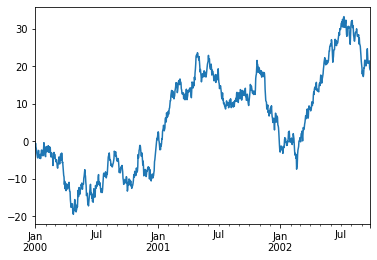

In [142]:
ts.plot()

In [143]:
# on a DataFrame, the plot() method is a convenience to plot all the columns with label
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [144]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

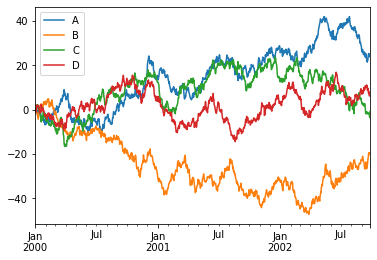

In [145]:
plt.figure()
df.plot()
plt.legend(loc='best')

# Getting Data in/out
saving, reading, formatting data into different formats

### CSV

In [146]:
# writing to a .csv file
df.to_csv('foo.csv')

In [148]:
# reading from a .csv file
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.229883,2.017630,-0.537413,0.344141
1,2000-01-02,0.479009,1.100115,-0.264225,-1.357007
2,2000-01-03,0.271715,0.336872,-0.107778,-0.165225
3,2000-01-04,-0.350427,-0.911926,0.598361,-0.537844
4,2000-01-05,-0.203945,-1.182795,-0.335676,0.500463
...,...,...,...,...,...
995,2002-09-22,25.215292,-19.665893,-1.997781,7.275795
996,2002-09-23,24.631009,-19.863212,-2.065212,6.952834
997,2002-09-24,24.725056,-19.368826,-2.066597,6.137601
998,2002-09-25,23.731141,-20.180249,-3.610688,6.130130


### HDF5

In [150]:
# writing to a HDF5 Store
df.to_hdf('foo.h5', 'df')

In [151]:
# reading from a HDF5 store
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.229883,2.017630,-0.537413,0.344141
2000-01-02,0.479009,1.100115,-0.264225,-1.357007
2000-01-03,0.271715,0.336872,-0.107778,-0.165225
2000-01-04,-0.350427,-0.911926,0.598361,-0.537844
2000-01-05,-0.203945,-1.182795,-0.335676,0.500463
...,...,...,...,...
2002-09-22,25.215292,-19.665893,-1.997781,7.275795
2002-09-23,24.631009,-19.863212,-2.065212,6.952834
2002-09-24,24.725056,-19.368826,-2.066597,6.137601
2002-09-25,23.731141,-20.180249,-3.610688,6.130130


### Excel

In [153]:
# writing to excel
df.to_excel('foo.xlsx', sheet_name='Sheet 1')

In [154]:
# reading from excel
pd.read_excel('foo.xlsx', sheet_name='Sheet 1')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.229883,2.017630,-0.537413,0.344141
1,2000-01-02,0.479009,1.100115,-0.264225,-1.357007
2,2000-01-03,0.271715,0.336872,-0.107778,-0.165225
3,2000-01-04,-0.350427,-0.911926,0.598361,-0.537844
4,2000-01-05,-0.203945,-1.182795,-0.335676,0.500463
...,...,...,...,...,...
995,2002-09-22,25.215292,-19.665893,-1.997781,7.275795
996,2002-09-23,24.631009,-19.863212,-2.065212,6.952834
997,2002-09-24,24.725056,-19.368826,-2.066597,6.137601
998,2002-09-25,23.731141,-20.180249,-3.610688,6.130130


In [155]:
pd.read_excel('foo.xlsx', 'Sheet 1', index_col=None, na_values=np.nan)

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.229883,2.017630,-0.537413,0.344141
1,2000-01-02,0.479009,1.100115,-0.264225,-1.357007
2,2000-01-03,0.271715,0.336872,-0.107778,-0.165225
3,2000-01-04,-0.350427,-0.911926,0.598361,-0.537844
4,2000-01-05,-0.203945,-1.182795,-0.335676,0.500463
...,...,...,...,...,...
995,2002-09-22,25.215292,-19.665893,-1.997781,7.275795
996,2002-09-23,24.631009,-19.863212,-2.065212,6.952834
997,2002-09-24,24.725056,-19.368826,-2.066597,6.137601
998,2002-09-25,23.731141,-20.180249,-3.610688,6.130130


# Essential Basic Functionalities in Pandas

### object creation

In [157]:

index = pd.date_range('1/1/2000', periods=8)
a = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e'])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])

In [158]:
a

a    1.276237
b    0.006549
c   -0.846776
d    1.071939
e   -0.729468
dtype: float64

In [159]:
df

,A,B,C
2000-01-01,2.751646,-0.290025,-0.290551
2000-01-02,-0.951712,0.521827,-1.086746
2000-01-03,-0.271108,-1.295801,-1.138710
2000-01-04,0.330526,0.592409,0.859884
2000-01-05,0.179767,-0.313677,0.687572
2000-01-06,-0.174385,2.026200,0.503648
2000-01-07,-1.043792,-0.180024,1.075509
2000-01-08,-0.361601,-1.244292,-0.982147


#### Head and Tail

In [160]:
long_series = pd.Series(np.random.rand(1000))

In [161]:
long_series.head()

0    0.264367
1    0.071573
2    0.645182
3    0.770682
4    0.988435
dtype: float64

In [162]:
long_series.tail()

995    0.540561
996    0.732048
997    0.180447
998    0.970340
999    0.681568
dtype: float64

### Attributes and underlying data
pandas objects hav a number of attributes enabling me to access the metadata
1. shape: gives axis dimension of the object
2. Axis labels
    - Series: index (only axis), i.e. no columns
    - DataFrame: index (rows) and columns
These attributes can be safelyy assigned to

In [163]:
df

,A,B,C
2000-01-01,2.751646,-0.290025,-0.290551
2000-01-02,-0.951712,0.521827,-1.086746
2000-01-03,-0.271108,-1.295801,-1.138710
2000-01-04,0.330526,0.592409,0.859884
2000-01-05,0.179767,-0.313677,0.687572
2000-01-06,-0.174385,2.026200,0.503648
2000-01-07,-1.043792,-0.180024,1.075509
2000-01-08,-0.361601,-1.244292,-0.982147


In [166]:
df[:2]

,A,B,C
2000-01-01,2.751646,-0.290025,-0.290551
2000-01-02,-0.951712,0.521827,-1.086746


In [167]:
df.columns = [x.lower() for x in df.columns]

In [168]:
df

,a,b,c
2000-01-01,2.751646,-0.290025,-0.290551
2000-01-02,-0.951712,0.521827,-1.086746
2000-01-03,-0.271108,-1.295801,-1.138710
2000-01-04,0.330526,0.592409,0.859884
2000-01-05,0.179767,-0.313677,0.687572
2000-01-06,-0.174385,2.026200,0.503648
2000-01-07,-1.043792,-0.180024,1.075509
2000-01-08,-0.361601,-1.244292,-0.982147


In [169]:
df.columns.str.upper()

Index(['A', 'B', 'C'], dtype='object')

In [170]:
df

,a,b,c
2000-01-01,2.751646,-0.290025,-0.290551
2000-01-02,-0.951712,0.521827,-1.086746
2000-01-03,-0.271108,-1.295801,-1.138710
2000-01-04,0.330526,0.592409,0.859884
2000-01-05,0.179767,-0.313677,0.687572
2000-01-06,-0.174385,2.026200,0.503648
2000-01-07,-1.043792,-0.180024,1.075509
2000-01-08,-0.361601,-1.244292,-0.982147


In [171]:
s.array

<PandasArray>
['A', 'B', 'C', 'Aaba', 'Baca', nan, 'CABA', 'dog', 'cat']
Length: 9, dtype: object

In [172]:
s.index.array

<PandasArray>
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Length: 9, dtype: int64

# Matching / Broadcasting Behavior
DataFrame has the methods add(), sub(), div(), mul(), and related functions radd(), rsub()... for carrying out binary operations

In [173]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

df

,one,two,three
a,-1.510387,0.230440,NaN
b,1.861342,0.042421,2.583523
c,-1.438766,-0.927010,0.022641
d,NaN,-0.494723,0.175466


In [174]:
row = df.iloc[1]
column = df['two']

In [175]:
# subtracting the row from the dataframe gives
df.sub(row, axis='columns')

,one,two,three
a,-3.371729,0.188019,NaN
b,0.000000,0.000000,0.000000
c,-3.300108,-0.969431,-2.560883
d,NaN,-0.537143,-2.408057


In [176]:
df.sub(row, axis=1)

,one,two,three
a,-3.371729,0.188019,NaN
b,0.000000,0.000000,0.000000
c,-3.300108,-0.969431,-2.560883
d,NaN,-0.537143,-2.408057


In [177]:
df.sub(column, axis='index')

,one,two,three
a,-1.740828,0.0,NaN
b,1.818921,0.0,2.541103
c,-0.511756,0.0,0.949651
d,NaN,0.0,0.670189


In [178]:
df.sub(column, axis=0)

,one,two,three
a,-1.740828,0.0,NaN
b,1.818921,0.0,2.541103
c,-0.511756,0.0,0.949651
d,NaN,0.0,0.670189


In [179]:
df.sub(0.5, axis=1)

,one,two,three
a,-2.010387,-0.269560,NaN
b,1.361342,-0.457579,2.083523
c,-1.938766,-1.427010,-0.477359
d,NaN,-0.994723,-0.324534


In [180]:
dfmi = df.copy()

In [181]:
dfmi.index = pd.MultiIndex.from_tuples([(1, 'a'), (1,'b'), (1, 'c'), (2, 'a')], names=['first', 'second'])

In [182]:
dfmi.sub(column, axis=0, level='second')

one       two     three
first second                              
1     a      -1.740828  0.000000       NaN
      b       1.818921  0.000000  2.541103
      c      -0.511756  0.000000  0.949651
2     a            NaN -0.725163 -0.054974

In [183]:
# using the divmod() operator: takes the floor division and modulo operation at same time and return 2 tuples
s = pd.Series(np.arange(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [184]:
s.array

<PandasArray>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Length: 10, dtype: int64

In [185]:
div, rem = divmod(s, 3)

In [186]:
div

0    0
1    0
2    0
3    1
4    1
5    1
6    2
7    2
8    2
9    3
dtype: int64

In [187]:
rem

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int64

## Missing data / Operations with fill values

In [189]:
df

,one,two,three
a,-1.510387,0.230440,NaN
b,1.861342,0.042421,2.583523
c,-1.438766,-0.927010,0.022641
d,NaN,-0.494723,0.175466


In [190]:
df2

A         B
first second                    
bar   one    -0.171826  0.499392
      two     0.702908 -0.974690
baz   one    -0.691660  1.556845
      two     0.552547  0.389480

In [192]:
df2 = df.copy()

In [193]:
df + df2

,one,two,three
a,-3.020775,0.460880,NaN
b,3.722684,0.084842,5.167047
c,-2.877532,-1.854021,0.045282
d,NaN,-0.989445,0.350932


In [194]:
df.add(df2, fill_value=0)

,one,two,three
a,-3.020775,0.460880,NaN
b,3.722684,0.084842,5.167047
c,-2.877532,-1.854021,0.045282
d,NaN,-0.989445,0.350932


## Flexible Comparisons
pandas uses: eq, lt, gt, le, ge, ne

In [195]:
df.gt(df2)

,one,two,three
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False


In [196]:
df.eq(df2)

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [197]:
df.ne(df2)

,one,two,three
a,False,False,True
b,False,False,False
c,False,False,False
d,True,False,False


## Boolean Reductions
empty, all(), any(), bool()

In [198]:
(df > 0).any()

one      True
two      True
three    True
dtype: bool

In [199]:
(df > 0).all()

one      False
two      False
three    False
dtype: bool

In [200]:
(df>0).any().all()

True

In [201]:
# to test if a pandas object is empty
df.empty

False

In [202]:
pd.DataFrame(columns=list('ABC')).empty

True

In [203]:
pd.DataFrame(columns=['A', 'B', 'C'])

,A,B,C


In [204]:
# To evaluate single element pandas object
pd.Series([True]).bool()

True

In [205]:
pd.Series([False]).bool()

False

In [206]:
# comparing if objects are equivalent
df + df == df * 2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [207]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

In [208]:
# to accurately compare if two dataframes are equivalent, use the equals method
(df + df).equals(df * 2)

True

In [209]:
(df + df).eq(df * 2)

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [210]:
# comparing array like objects
pd.Series(['foo', 'bar', 'baz']) == 'foo'

0     True
1    False
2    False
dtype: bool

In [212]:
pd.Index(['foo', 'bar', 'baz']) == 'foo'

array([ True, False, False])

In [215]:
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])

ValueError: Can only compare identically-labeled Series objects

In [3]:
import pandas as pd
import numpy as np
# Combining Overlapping Data set
df1 = pd.DataFrame({'A': [1., np.nan, 3., 5., np.nan], 
                   'B': [np.nan, 2., 3., np.nan, 6.]})

df2 = pd.DataFrame({'A': [5., 2., 4., np.nan, 3., 7.],
                   'B': [np.nan, np.nan, 3., 4., 6., 8.]})


In [4]:
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [5]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [6]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


In [7]:
# General DataFrame combine
def combiner(x, y):
    return np.where(pd.isna(x), y, x)

ValueError: operands could not be broadcast together with shapes (5,2) (6,2) (5,2) 

# Descriptive Statistics
Series: no argument needed
DataFrame: 'index' (axis=0, default), 'columns' (axis=1)

In [11]:
df = df1.copy

In [12]:
df

<bound method NDFrame.copy of      A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  3.0
3  5.0  NaN
4  NaN  6.0>

In [14]:
df1.mean()

A    3.000000
B    3.666667
dtype: float64

In [224]:
df.mean(1)

a   -0.639974
b    1.495762
c   -0.781045
d   -0.159628
dtype: float64

In [225]:
df.mean(axis=1)

a   -0.639974
b    1.495762
c   -0.781045
d   -0.159628
dtype: float64

In [226]:
# all these methods have a skipna option
df.sum(0, skipna=False)

one           NaN
two     -1.148872
three         NaN
dtype: float64

In [227]:
df.sum(1, skipna=True)

a   -1.279947
b    4.487286
c   -2.343136
d   -0.319256
dtype: float64

In [228]:
# descriptive and broadcasting
ts_stand = (df - df.mean()) / df.std()

ts_stand

,one,two,three
a,-0.595841,0.984737,NaN
b,1.154501,0.627069,1.153066
c,-0.558660,-1.217072,-0.629728
d,NaN,-0.394734,-0.523337


In [1]:
df

NameError: name 'df' is not defined

### Summarizing Data
using describe () func

In [15]:
series = pd.Series(np.random.randn(1000))

In [16]:
series[::2] = np.nan

In [17]:
series.describe()

count    500.000000
mean      -0.059499
std        0.941765
min       -2.939017
25%       -0.660838
50%       -0.084687
75%        0.495391
max        4.217847
dtype: float64

In [18]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=list('abcde'))

In [19]:
frame.iloc[::2] = np.nan

In [22]:
frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.009251,-0.029698,-0.030947,-0.011235,0.026040
std,1.002117,1.041770,1.010857,0.972404,0.992477
min,-3.026352,-3.310543,-2.493926,-3.320372,-3.178811
25%,-0.694680,-0.700919,-0.733416,-0.626751,-0.634421
50%,0.010348,0.023505,-0.115112,-0.013008,0.001197
75%,0.697842,0.665501,0.664652,0.640024,0.631275
max,4.575437,3.489552,3.119380,3.408882,3.183724


In [23]:
pass

In [25]:
series.describe(percentiles=[.05, .25, .75, .95])

count    500.000000
mean      -0.059499
std        0.941765
min       -2.939017
5%        -1.559169
25%       -0.660838
50%       -0.084687
75%        0.495391
95%        1.539950
max        4.217847
dtype: float64

In [27]:
frame = pd.DataFrame({'a': ['yes', 'yes', 'No', 'No'], 'b': range(4)})
frame.describe(include=['object'])

,a
count,4
unique,2
top,yes
freq,2


In [28]:
frame.describe(include=['number'])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [30]:
frame.describe(include='all')

,a,b
count,4,4.000000
unique,2,NaN
top,yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [31]:
## Index of min, and max values
# idxmin() and idxmax()
s1 = pd.Series(np.random.randn(5))
s1

0   -0.544123
1    0.072910
2   -0.917578
3   -0.484356
4   -0.694550
dtype: float64

In [32]:
s1.idxmin(), s1.idxmax()

(2, 1)

In [33]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=list('ABC'))
df1

,A,B,C
0,0.735715,-0.929966,0.690229
1,-0.763032,0.539337,-0.078526
2,-1.321032,1.819837,0.748113
3,0.786114,0.234112,-1.580604
4,1.016326,0.726204,1.185956


In [34]:
df1.idxmin(axis=1)

0    B
1    A
2    A
3    C
4    B
dtype: object

In [36]:
df1.idxmin()

A    2
B    0
C    3
dtype: int64

In [37]:
df1.idxmax()

A    4
B    2
C    4
dtype: int64

### value counts(histogramming)

In [38]:
data = np.random.randint(0, 7, 50)

In [39]:
data

array([5, 5, 6, 0, 5, 2, 3, 5, 0, 4, 6, 2, 0, 5, 0, 2, 0, 1, 1, 4, 2, 2,
       5, 6, 4, 5, 4, 1, 6, 5, 1, 3, 1, 1, 4, 1, 5, 4, 6, 5, 5, 4, 4, 3,
       5, 5, 6, 6, 2, 5])

In [41]:
s = pd.Series(data, index=pd.date_range('01/01/2006', periods=50))

In [42]:
s

2006-01-01    5
2006-01-02    5
2006-01-03    6
2006-01-04    0
2006-01-05    5
2006-01-06    2
2006-01-07    3
2006-01-08    5
2006-01-09    0
2006-01-10    4
2006-01-11    6
2006-01-12    2
2006-01-13    0
2006-01-14    5
2006-01-15    0
2006-01-16    2
2006-01-17    0
2006-01-18    1
2006-01-19    1
2006-01-20    4
2006-01-21    2
2006-01-22    2
2006-01-23    5
2006-01-24    6
2006-01-25    4
2006-01-26    5
2006-01-27    4
2006-01-28    1
2006-01-29    6
2006-01-30    5
2006-01-31    1
2006-02-01    3
2006-02-02    1
2006-02-03    1
2006-02-04    4
2006-02-05    1
2006-02-06    5
2006-02-07    4
2006-02-08    6
2006-02-09    5
2006-02-10    5
2006-02-11    4
2006-02-12    4
2006-02-13    3
2006-02-14    5
2006-02-15    5
2006-02-16    6
2006-02-17    6
2006-02-18    2
2006-02-19    5
Freq: D, dtype: int64

In [43]:
s.value_counts()

5    14
4     8
6     7
1     7
2     6
0     5
3     3
dtype: int64

In [44]:
pd.value_counts(data)

5    14
4     8
6     7
1     7
2     6
0     5
3     3
dtype: int64

In [45]:
s.mode()

0    5
dtype: int64

In [46]:
df5 = pd.DataFrame({'A': np.random.randint(0, 7, 50), 'B': np.random.randint(-10, 15, size=50)})
df5.mode()

,A,B
0,6,9


## Discretization and Quantiling
continous values can be discretized using the cut() (bins based on values) and qcut() (bins based on sample quantiles) functions:

In [48]:
arr = np.random.randn(20)
arr

array([-0.47048036, -0.35025947,  0.59022844,  0.37278132,  1.647496  ,
       -0.45867524,  1.13155238, -0.08354286,  2.10760863,  1.00362805,
       -0.18786559, -1.61640752, -0.74760191,  0.9648863 , -0.68600185,
       -0.80471546,  0.46951957, -0.75185324, -0.91879963,  1.43293881])

In [49]:
factor = pd.cut(arr, 4)
factor

[(-0.685, 0.246], (-0.685, 0.246], (0.246, 1.177], (0.246, 1.177], (1.177, 2.108], ..., (-1.62, -0.685], (0.246, 1.177], (-1.62, -0.685], (-1.62, -0.685], (1.177, 2.108]]
Length: 20
Categories (4, interval[float64]): [(-1.62, -0.685] < (-0.685, 0.246] < (0.246, 1.177] < (1.177, 2.108]]

In [50]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])
factor

[(-1, 0], (-1, 0], (0, 1], (0, 1], (1, 5], ..., (-1, 0], (0, 1], (-1, 0], (-1, 0], (1, 5]]
Length: 20
Categories (4, interval[int64]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

In [51]:
# qcut() computes sample quartiles
arr = np.random.randn(30)

In [52]:
factor = pd.qcut(arr, [0, .25, .5, .75, 1])

In [53]:
factor

[(-4.285, -0.379], (-4.285, -0.379], (-4.285, -0.379], (-0.379, 0.305], (0.751, 1.726], ..., (-0.379, 0.305], (-0.379, 0.305], (0.305, 0.751], (0.751, 1.726], (-4.285, -0.379]]
Length: 30
Categories (4, interval[float64]): [(-4.285, -0.379] < (-0.379, 0.305] < (0.305, 0.751] < (0.751, 1.726]]

In [54]:
# we could pass infinite values to define the bins
factor = pd.cut(arr, [-np.inf, 0, np.inf])

In [55]:
factor

[(-inf, 0.0], (-inf, 0.0], (-inf, 0.0], (-inf, 0.0], (0.0, inf], ..., (-inf, 0.0], (0.0, inf], (0.0, inf], (0.0, inf], (-inf, 0.0]]
Length: 30
Categories (2, interval[float64]): [(-inf, 0.0] < (0.0, inf]]

# Function application
To apply your own function in pandas objects...depends on whether it will operate on a DataFrame or Series, 
row-wise or column-wise or even elementwise
The following methods are relevant to function application in pandas:
    1. Tablewise function app: pipe()
    2. Row or Columns-wise app: apply()
    3. Aggregation API: agg() and transform()
    4. Applying Elementwise: applymap()


In [56]:
# Tablewise function application
def extract_city_name(df):
    """
    Chicago, IL -> Chicago for city_name column
    """
    df['city_name'] = df['city_and_code'].str.split(",").str.get(0)
    return df

In [57]:
def add_country_name(df, country_name=None):
    """
    Chicago -> Chicago-US for city_name column
    """
    col = 'city_name'
    df['city_and_country'] = df[col] + country_name
    return df

In [58]:
df_p = pd.DataFrame({'city_and_code': ['Chicago, IL']})

In [59]:
# calling the function
add_country_name(extract_city_name(df_p), country_name='US')

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [60]:
# the above expressions is equivalent to this "Method Chaining" which is more encouraged!
(df_p.pipe(extract_city_name).pipe(add_country_name, country_name='US'))

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

In [2]:
#Row or column-wise application
df = pd.DataFrame(np.random.randn(5, 3), columns=['one', 'two', 'three'])
df

,one,two,three
0,0.455811,-0.395154,-0.312962
1,-0.883593,-0.866032,0.295438
2,-0.117762,1.392734,0.146127
3,-0.783780,0.569517,0.500009
4,-0.063825,0.395975,1.821341


In [3]:
df.apply(np.mean)

one     -0.278630
two      0.219408
three    0.489990
dtype: float64

In [4]:
df.apply(np.mean, axis=1)

0   -0.084102
1   -0.484729
2    0.473700
3    0.095249
4    0.717830
dtype: float64

In [5]:
df.apply(lambda x: x.max() - x.min())

one      1.339404
two      2.258765
three    2.134303
dtype: float64

In [7]:
df.apply(np.cumsum)

,one,two,three
0,0.455811,-0.395154,-0.312962
1,-0.427782,-1.261186,-0.017524
2,-0.545544,0.131547,0.128603
3,-1.329324,0.701065,0.628611
4,-1.393150,1.097040,2.449952


In [8]:
df.apply(np.exp)

,one,two,three
0,1.577452,0.673576,0.731277
1,0.413295,0.420617,1.343715
2,0.888908,4.025840,1.157343
3,0.456676,1.767414,1.648736
4,0.938169,1.485832,6.180138


In [9]:
df.cumsum

<bound method DataFrame.cumsum of         one       two     three
0  0.455811 -0.395154 -0.312962
1 -0.883593 -0.866032  0.295438
2 -0.117762  1.392734  0.146127
3 -0.783780  0.569517  0.500009
4 -0.063825  0.395975  1.821341>

In [10]:
# aply() method will also dispatch on a string method name
df.apply('mean', axis='index')

one     -0.278630
two      0.219408
three    0.489990
dtype: float64

In [13]:
# apply() combined with some creativity can be used to answer many question about a dataset
tsdf =pd.DataFrame(np.random.randn(1000,3), columns=list('ABC'),
                   index=pd.date_range('1/1/2000', periods=1000, freq='D'))

In [14]:
tsdf.apply(lambda x: x.idxmax())

A   2001-07-05
B   2002-09-04
C   2001-12-07
dtype: datetime64[ns]

In [15]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [16]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,one,two,three
0,-1.514730,-1.798385,-1.770987
1,-1.961198,-1.955344,-1.568187
2,-1.705921,-1.202422,-1.617958
3,-1.927927,-1.476828,-1.499997
4,-1.687942,-1.534675,-1.059553


In [17]:
# passing series method to carry out some series operation on each column or row
tsdf

,A,B,C
2000-01-01,-0.524030,-0.082377,1.640829
2000-01-02,0.264864,-1.435716,0.652702
2000-01-03,1.258401,0.096130,-0.566320
2000-01-04,0.108103,1.092272,-0.904445
2000-01-05,0.034634,1.776257,-0.729109
...,...,...,...
2002-09-22,-0.463626,-0.557423,2.714197
2002-09-23,-1.927267,-1.125281,-1.557334
2002-09-24,-2.022438,0.718450,-1.956114
2002-09-25,-0.533616,-2.057642,0.077421


In [18]:
tsdf.apply(pd.Series.interpolate)

,A,B,C
2000-01-01,-0.524030,-0.082377,1.640829
2000-01-02,0.264864,-1.435716,0.652702
2000-01-03,1.258401,0.096130,-0.566320
2000-01-04,0.108103,1.092272,-0.904445
2000-01-05,0.034634,1.776257,-0.729109
...,...,...,...
2002-09-22,-0.463626,-0.557423,2.714197
2002-09-23,-1.927267,-1.125281,-1.557334
2002-09-24,-2.022438,0.718450,-1.956114
2002-09-25,-0.533616,-2.057642,0.077421


## Aggregation API
Aggregation API allows me to express possibly multiple aggregation operations in a single concise way. Entry point for aggregation is DataFrame.aggregate() or DataFrame.agg()

In [19]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'), 
                   index=pd.date_range('1/1/2000', periods=10))

In [20]:
tsdf.iloc[::3] = np.nan

In [21]:
tsdf

,A,B,C
2000-01-01,NaN,NaN,NaN
2000-01-02,-0.454999,-0.626021,0.734152
2000-01-03,-0.875598,1.097144,0.719018
2000-01-04,NaN,NaN,NaN
2000-01-05,0.173682,-0.388605,-1.401305
2000-01-06,-0.290831,-1.670468,-0.962038
2000-01-07,NaN,NaN,NaN
2000-01-08,0.436365,0.119809,-0.883020
2000-01-09,1.380806,-0.314003,0.971456
2000-01-10,NaN,NaN,NaN


In [22]:
# using a single function is equivalent to apply()
tsdf.agg(np.sum)

A    0.369426
B   -1.782144
C   -0.821738
dtype: float64

In [24]:
tsdf.agg('sum')

A    0.369426
B   -1.782144
C   -0.821738
dtype: float64

In [25]:
tsdf.sum()

A    0.369426
B   -1.782144
C   -0.821738
dtype: float64

In [26]:
# single aggregation on a series will return a scalar value
tsdf['A'].agg('sum')

0.36942592903963845

#### Aggregating with multiple functions
You can pass multiple aggregation arguments as a list

In [27]:
tsdf.agg(['sum'])

,A,B,C
sum,0.369426,-1.782144,-0.821738


In [28]:
tsdf.agg(['sum', 'mean'])

,A,B,C
sum,0.369426,-1.782144,-0.821738
mean,0.061571,-0.297024,-0.136956


In [30]:
# on a series multiple functions return a Series, indexed by the functions name:
tsdf['A'].agg(['sum', 'mean'])

sum     0.369426
mean    0.061571
Name: A, dtype: float64

In [31]:
# passing a lambda() will yield a lambda named row
tsdf['A'].agg(['sum', lambda x: x.mean()])

sum         0.369426
<lambda>    0.061571
Name: A, dtype: float64

In [32]:
# passing a known function will yield that name for the row
def mymean(x):
    return x.mean()

tsdf['A'].agg(['sum', mymean])

sum       0.369426
mymean    0.061571
Name: A, dtype: float64

#### Aggregating with a dict
passing a dictionary of column names to a scalar or a list of scalars to DataFrame.agg allows you to customize
which fuctions are applied to which columns...Result is usually not in a particular order but you can use
OrderedDict instead to guarantee ordering

In [33]:
tsdf.agg({'A':'mean', 'B': 'sum'})

A    0.061571
B   -1.782144
dtype: float64

In [35]:
tsdf.agg({'A':['mean', 'min'], 'B': 'sum'})

,A,B
mean,0.061571,NaN
min,-0.875598,NaN
sum,NaN,-1.782144


In [36]:
# mixed dtypes: .agg() will only take the valid aggregations
mdf = pd.DataFrame({'A': [1, 2, 3], 
                   'B': [1., 2., 3.], 
                   'C': ['foo', 'bar', 'baz'], 
                   'D': pd.date_range('20130101', periods=3)})


In [37]:
mdf.dtypes

A             int64
B           float64
C            object
D    datetime64[ns]
dtype: object

In [38]:
mdf.agg(['sum', 'mean'])

,A,B,C,D
sum,6.0,6.0,foobarbaz,NaT
mean,2.0,2.0,NaN,2013-01-02


In [39]:
### Custom describe: with .agg() it is possible to create a custom describe function
from functools import partial
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = '25%'
q_75 = partial(pd.Series.quantile, q=0.75)
q_75.__name__ = '75%'

In [40]:
tsdf.agg(['count', 'mean', 'std', 'min', q_25, 'median', q_75, 'max'])

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.061571,-0.297024,-0.136956
std,0.795329,0.907823,1.054139
min,-0.875598,-1.670468,-1.401305
25%,-0.413957,-0.566667,-0.942284
median,-0.058574,-0.351304,-0.082001
75%,0.370694,0.011356,0.730369
max,1.380806,1.097144,0.971456


## Transform API
the transform() method returns an onject that is indexed the same as the original. The API allows provision of 
multiple operations at same time rather than one-by-one. 

In [42]:
tsdf = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'), index=pd.date_range('1/1/2000', periods =10))

In [43]:
tsdf.iloc[3:7] = np.nan
tsdf

,A,B,C
2000-01-01,0.665644,1.027732,-0.967206
2000-01-02,-0.669159,0.496205,-0.148706
2000-01-03,-0.234697,0.742136,0.279482
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,-0.716932,2.620319,1.267007
2000-01-09,-0.176084,-0.367204,-0.438137
2000-01-10,0.180269,2.583121,1.363506


In [44]:
# transform the entire frame .transform() allows input functions as: 
# Numpy, string func name or user defined function like .agg()
tsdf.transform(np.abs)

,A,B,C
2000-01-01,0.665644,1.027732,0.967206
2000-01-02,0.669159,0.496205,0.148706
2000-01-03,0.234697,0.742136,0.279482
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.716932,2.620319,1.267007
2000-01-09,0.176084,0.367204,0.438137
2000-01-10,0.180269,2.583121,1.363506


In [45]:
tsdf.transform('abs')

,A,B,C
2000-01-01,0.665644,1.027732,0.967206
2000-01-02,0.669159,0.496205,0.148706
2000-01-03,0.234697,0.742136,0.279482
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.716932,2.620319,1.267007
2000-01-09,0.176084,0.367204,0.438137
2000-01-10,0.180269,2.583121,1.363506


In [46]:
tsdf.transform(lambda x: x.abs())

,A,B,C
2000-01-01,0.665644,1.027732,0.967206
2000-01-02,0.669159,0.496205,0.148706
2000-01-03,0.234697,0.742136,0.279482
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-08,0.716932,2.620319,1.267007
2000-01-09,0.176084,0.367204,0.438137
2000-01-10,0.180269,2.583121,1.363506


In [47]:
# passing a single function with a Series will yield a Series
tsdf['A'].transform(np.abs)

2000-01-01    0.665644
2000-01-02    0.669159
2000-01-03    0.234697
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-08    0.716932
2000-01-09    0.176084
2000-01-10    0.180269
Freq: D, Name: A, dtype: float64

In [50]:
# transform with multiple functions passed as a list
tsdf.transform([np.abs, lambda x: x + 1])

A                   B                   C          
            absolute  <lambda>  absolute  <lambda>  absolute  <lambda>
2000-01-01  0.665644  1.665644  1.027732  2.027732  0.967206  0.032794
2000-01-02  0.669159  0.330841  0.496205  1.496205  0.148706  0.851294
2000-01-03  0.234697  0.765303  0.742136  1.742136  0.279482  1.279482
2000-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN       NaN       NaN
2000-01-08  0.716932  0.283068  2.620319  3.620319  1.267007  2.267007
2000-01-09  0.176084  0.823916  0.367204  0.632796  0.438137  0.561863
2000-01-10  0.180269  1.180269  2.583121  3.583121  1.363506  2.363506

In [52]:
tsdf['A'].transform([np.abs, lambda x: x + 1])

,absolute,<lambda>
2000-01-01,0.665644,1.665644
2000-01-02,0.669159,0.330841
2000-01-03,0.234697,0.765303
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,0.716932,0.283068
2000-01-09,0.176084,0.823916
2000-01-10,0.180269,1.180269


In [53]:
# Transforming with dict
tsdf.transform({'A': np.abs, 'B': lambda x: x + 1})

,A,B
2000-01-01,0.665644,2.027732
2000-01-02,0.669159,1.496205
2000-01-03,0.234697,1.742136
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-08,0.716932,3.620319
2000-01-09,0.176084,0.632796
2000-01-10,0.180269,3.583121


In [54]:
tsdf.transform({'A': np.abs, 'B': [lambda x: x + 1, 'sqrt']})

/Users/JOBA/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


A         B          
            absolute  <lambda>      sqrt
2000-01-01  0.665644  2.027732  1.013771
2000-01-02  0.669159  1.496205  0.704418
2000-01-03  0.234697  1.742136  0.861473
2000-01-04       NaN       NaN       NaN
2000-01-05       NaN       NaN       NaN
2000-01-06       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN
2000-01-08  0.716932  3.620319  1.618740
2000-01-09  0.176084  0.632796       NaN
2000-01-10  0.180269  3.583121  1.607209

### Applying elementwise functions
The methods applymap() on DataFrame and map() on Series accept any Python function taking a single value and returning a single value

In [55]:
df4 = pd.DataFrame(np.random.randn(4, 3), columns=['one', 'two', 'three'], index=list('abcd'))
df4

,one,two,three
a,0.627177,-0.414691,-0.770745
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
d,1.519958,1.734330,1.423495


In [56]:
def f(x):
    return len(str(x))

In [57]:
df4['one'].map(f)

a    18
b    20
c    19
d    18
Name: one, dtype: int64

In [58]:
df4.applymap(f)

,one,two,three
a,18,20,19
b,20,19,19
c,19,19,18
d,18,17,17


## Reindexing and Altering labels
reindex() is the fundamental data alignment method in pandas. Reindexing accomplishes several things
1. Reorders the existing data to match a new set of labels
2. insert missing value (NA) markers in label locations where no data for that label existed
3. if specified, fill data for missing labesls using logic

In [59]:
s = pd.Series(np.random.randn(5), index=list('abcde'))
s

a    0.427514
b   -0.195380
c    0.166303
d    1.091986
e    1.565653
dtype: float64

In [60]:
s.reindex(['e', 'b', 'f', 'd'])

e    1.565653
b   -0.195380
f         NaN
d    1.091986
dtype: float64

In [61]:
# with a dataframe the index and column can be simultaneously reindexed
df4

,one,two,three
a,0.627177,-0.414691,-0.770745
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
d,1.519958,1.734330,1.423495


In [62]:
df = df4

In [63]:
df

,one,two,three
a,0.627177,-0.414691,-0.770745
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
d,1.519958,1.734330,1.423495


In [64]:
df.reindex(index=['c', 'f', 'b'], columns=['three', 'two', 'one'])

,three,two,one
c,0.401047,-0.075185,-0.703078
f,NaN,NaN,NaN
b,0.394521,-1.544888,-0.035347


In [65]:
# reindex can be used with the axis keyword
df.reindex(['a', 'd', 'f'], axis='index')

,one,two,three
a,0.627177,-0.414691,-0.770745
d,1.519958,1.734330,1.423495
f,NaN,NaN,NaN


In [66]:
rs = s.reindex(df.index)

In [67]:
rs

a    0.427514
b   -0.195380
c    0.166303
d    1.091986
dtype: float64

In [68]:
rs.index is df.index

True

In [73]:
# when reindexing to align with another object use the method .reindex_like()
df2 = df.iloc[:3, 0:2]

In [74]:
df2

,one,two
a,0.627177,-0.414691
b,-0.035347,-1.544888
c,-0.703078,-0.075185


In [75]:
df3 =pd.DataFrame(np.random.randn(3, 2), columns=df2.columns, index=df2.index)
df3

,one,two
a,-1.099585,-0.622629
b,-0.447290,0.797979
c,-0.294242,-0.027823


In [76]:
df.reindex_like(df2)

,one,two
a,0.627177,-0.414691
b,-0.035347,-1.544888
c,-0.703078,-0.075185


### Aligning objects with each other using align() with the join :
join = "outer" : takes the union of the indexes (default)
join = "left" : uses the caling object's index
join = "right": use the passed object's index
join = "inner" : intersect the indexes

In [79]:
s = pd.Series(np.random.randn(5), index=list('abcde'))
s1 = s[:4]
s2 = s[1:]

In [80]:
s1.align(s2)

(a   -0.446263
 b    0.217611
 c   -0.880920
 d    1.019116
 e         NaN
 dtype: float64, a         NaN
 b    0.217611
 c   -0.880920
 d    1.019116
 e    1.510043
 dtype: float64)

In [81]:
s1.align(s2, join='inner')

(b    0.217611
 c   -0.880920
 d    1.019116
 dtype: float64, b    0.217611
 c   -0.880920
 d    1.019116
 dtype: float64)

In [82]:
s1.align(s2, 'left')

(a   -0.446263
 b    0.217611
 c   -0.880920
 d    1.019116
 dtype: float64, a         NaN
 b    0.217611
 c   -0.880920
 d    1.019116
 dtype: float64)

In [84]:
s1.align(s2, 'right')

(b    0.217611
 c   -0.880920
 d    1.019116
 e         NaN
 dtype: float64, b    0.217611
 c   -0.880920
 d    1.019116
 e    1.510043
 dtype: float64)

In [85]:
# for dataframes the join method will apply to both the row and column by default
df.align(df2, 'inner')

(        one       two
 a  0.627177 -0.414691
 b -0.035347 -1.544888
 c -0.703078 -0.075185,         one       two
 a  0.627177 -0.414691
 b -0.035347 -1.544888
 c -0.703078 -0.075185)

In [86]:
df.align(df2, join='inner', axis=0)

(        one       two     three
 a  0.627177 -0.414691 -0.770745
 b -0.035347 -1.544888  0.394521
 c -0.703078 -0.075185  0.401047,         one       two
 a  0.627177 -0.414691
 b -0.035347 -1.544888
 c -0.703078 -0.075185)

In [87]:
df.align(df2.iloc[0], axis=1)

(        one     three       two
 a  0.627177 -0.770745 -0.414691
 b -0.035347  0.394521 -1.544888
 c -0.703078  0.401047 -0.075185
 d  1.519958  1.423495  1.734330, one      0.627177
 three         NaN
 two     -0.414691
 Name: a, dtype: float64)

In [88]:
# filling while reindexing using the attribute method()s: ffill(pad), bfill(backfill) and nearest
rng = pd.date_range('1/3/2000', periods=8)
ts = pd.Series(np.random.randn(8), index=rng)

In [89]:
ts2 = ts[[0, 3, 6]]

In [90]:
ts

2000-01-03   -0.414263
2000-01-04   -1.156544
2000-01-05    0.674605
2000-01-06   -1.060972
2000-01-07   -1.422909
2000-01-08   -0.253231
2000-01-09   -0.944271
2000-01-10    0.628613
Freq: D, dtype: float64

In [91]:
ts2

2000-01-03   -0.414263
2000-01-06   -1.060972
2000-01-09   -0.944271
dtype: float64

In [92]:
ts2.reindex(ts.index)

2000-01-03   -0.414263
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -1.060972
2000-01-07         NaN
2000-01-08         NaN
2000-01-09   -0.944271
2000-01-10         NaN
Freq: D, dtype: float64

In [93]:
ts2.reindex(ts.index, method='ffill')

2000-01-03   -0.414263
2000-01-04   -0.414263
2000-01-05   -0.414263
2000-01-06   -1.060972
2000-01-07   -1.060972
2000-01-08   -1.060972
2000-01-09   -0.944271
2000-01-10   -0.944271
Freq: D, dtype: float64

In [94]:
ts2.reindex(ts.index, method='bfill')

2000-01-03   -0.414263
2000-01-04   -1.060972
2000-01-05   -1.060972
2000-01-06   -1.060972
2000-01-07   -0.944271
2000-01-08   -0.944271
2000-01-09   -0.944271
2000-01-10         NaN
Freq: D, dtype: float64

In [95]:
ts2.reindex(ts.index, method='nearest')

2000-01-03   -0.414263
2000-01-04   -0.414263
2000-01-05   -1.060972
2000-01-06   -1.060972
2000-01-07   -1.060972
2000-01-08   -0.944271
2000-01-09   -0.944271
2000-01-10   -0.944271
Freq: D, dtype: float64

In [96]:
ts2.reindex(ts.index).fillna(method='ffill')

2000-01-03   -0.414263
2000-01-04   -0.414263
2000-01-05   -0.414263
2000-01-06   -1.060972
2000-01-07   -1.060972
2000-01-08   -1.060972
2000-01-09   -0.944271
2000-01-10   -0.944271
Freq: D, dtype: float64

In [97]:
# limits on filling while indexing
ts2.reindex(ts.index, method='ffill', limit=1)

2000-01-03   -0.414263
2000-01-04   -0.414263
2000-01-05         NaN
2000-01-06   -1.060972
2000-01-07   -1.060972
2000-01-08         NaN
2000-01-09   -0.944271
2000-01-10   -0.944271
Freq: D, dtype: float64

In [98]:
# tolerance specifies the maximum distance between th e index and indexer values:
ts2.reindex(ts.index, method='ffill', tolerance='1 day')

2000-01-03   -0.414263
2000-01-04   -0.414263
2000-01-05         NaN
2000-01-06   -1.060972
2000-01-07   -1.060972
2000-01-08         NaN
2000-01-09   -0.944271
2000-01-10   -0.944271
Freq: D, dtype: float64

In [99]:
# dropping labels from an axis using the drop() function
df

,one,two,three
a,0.627177,-0.414691,-0.770745
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
d,1.519958,1.734330,1.423495


In [100]:
df.drop(['a', 'd'], axis=0)

,one,two,three
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047


In [101]:
df.drop(['one'], axis=1)

,two,three
a,-0.414691,-0.770745
b,-1.544888,0.394521
c,-0.075185,0.401047
d,1.734330,1.423495


In [102]:
df.reindex(df.index.difference(['a', 'd']))

,one,two,three
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047


In [103]:
# Renaming / mapping labels
# rename() method allows me to relabel an axis based on some mapping or arbitrary function
s

a   -0.446263
b    0.217611
c   -0.880920
d    1.019116
e    1.510043
dtype: float64

In [104]:
s.rename(str.upper)

A   -0.446263
B    0.217611
C   -0.880920
D    1.019116
E    1.510043
dtype: float64

In [105]:
s

a   -0.446263
b    0.217611
c   -0.880920
d    1.019116
e    1.510043
dtype: float64

In [106]:
df_new = df.rename(columns={'one':'foo', 'two':'bar'}, 
                  index={'a':'apple', 'b':'banana', 'd':'durian'})

In [107]:
df_new

,foo,bar,three
apple,0.627177,-0.414691,-0.770745
banana,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
durian,1.519958,1.734330,1.423495


In [108]:
# DataFrame.rename() also supports an 'axis style' calling convention
df.rename({'one':'foo', 'two':'bar'}, axis=1)

,foo,bar,three
a,0.627177,-0.414691,-0.770745
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
d,1.519958,1.734330,1.423495


In [109]:
df

,one,two,three
a,0.627177,-0.414691,-0.770745
b,-0.035347,-1.544888,0.394521
c,-0.703078,-0.075185,0.401047
d,1.519958,1.734330,1.423495


In [110]:
# finally, rename() accepts a scalar or list-like for altering the Series.name attribute
s.rename("scalar-name")

a   -0.446263
b    0.217611
c   -0.880920
d    1.019116
e    1.510043
Name: scalar-name, dtype: float64

In [111]:
# rename_axis() allows specific names of a Multiindex to be changed
df = pd.DataFrame({'x':[1, 2, 3, 4, 5, 6], 
                   'y': [10, 20, 30, 40, 50, 60]}, 
                  index= pd.MultiIndex.from_product([list('abc'), [1, 2]], 
                                                   names=['let', 'num']))

In [112]:
df

x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [116]:
df.rename_axis(index={'let':'abc'})

x   y
abc num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [114]:
df.rename_axis(index=str.upper)

x   y
LET NUM       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

## Iteration
Iteration over pandas depends on type. iterating over Series produces the values. DataFrame on the otherhand 
follow dict-like convention of iterating over the 'keys' of the objects. DataFrame produce column labels

In [118]:
df = pd.DataFrame({'col1': np.random.randn(3), 
                   'col2': np.random.randn(3)}, index=['a', 'b', 'c'])

In [120]:
for col in df:
    print(col)

col1
col2


In [121]:
for x in df['col1']:
    print(x)

-0.8553766460448816
-0.45202331158495523
-0.9622853893164478


In [122]:
"""
# to iterate over the rows of a DataFrame
# iterrows() iterate over the row of a DataFrame as index Series pair
# itertuples() iterate over the rows of a DataFrame as namedtuples of the values...a lot faster
"""
df = pd.DataFrame({'a': [1, 2, 3], 'b':['a', 'b', 'c']})

In [125]:
for index, row in df.iterrows():
    row['a'] = 10
    print(index, row)

0 a    10
b     a
Name: 0, dtype: object
1 a    10
b     b
Name: 1, dtype: object
2 a    10
b     c
Name: 2, dtype: object


In [124]:
df

,a,b
0,1,a
1,2,b
2,3,c


In [127]:
# items
# items iterate via key-value pair
for label, ser in df.items():
    print(label)
    print(ser)

a
0    1
1    2
2    3
Name: a, dtype: int64
b
0    a
1    b
2    c
Name: b, dtype: object


In [130]:
# iterrows
for row_index, row in df.iterrows():
    print(row_index, row, sep='\n')

0
a    1
b    a
Name: 0, dtype: object
1
a    2
b    b
Name: 1, dtype: object
2
a    3
b    c
Name: 2, dtype: object


In [131]:
# itertuples() method will return an iterator yielding a namedtuplefor each row in the DataFrame
for row in df.itertuples():
    print(row)

Pandas(Index=0, a=1, b='a')
Pandas(Index=1, a=2, b='b')
Pandas(Index=2, a=3, b='c')


#### .dt accessor
Seris have an accessor to succintly return datetime like properties for the values of the Series, if it
is a datetime/period Series

In [132]:
#datetime
s = pd.Series(pd.date_range('20130101 09:10:12', periods=4))
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [133]:
sample = pd.date_range('20130101 09:10:12', periods=4)
sample

DatetimeIndex(['2013-01-01 09:10:12', '2013-01-02 09:10:12',
               '2013-01-03 09:10:12', '2013-01-04 09:10:12'],
              dtype='datetime64[ns]', freq='D')

In [134]:
s.dt.hour

0    9
1    9
2    9
3    9
dtype: int64

In [135]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int64

In [136]:
s.dt.second

0    12
1    12
2    12
3    12
dtype: int64

In [137]:
# using .dt accessor
s[s.dt.day == 2]

1   2013-01-02 09:10:12
dtype: datetime64[ns]

In [138]:
# we can easily produce timezone aware information
stz = s.dt.tz_localize('US/Eastern')

In [139]:
stz

0   2013-01-01 09:10:12-05:00
1   2013-01-02 09:10:12-05:00
2   2013-01-03 09:10:12-05:00
3   2013-01-04 09:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [141]:
stz.dt.tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [142]:
# the operation can also be chained
s.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

0   2013-01-01 04:10:12-05:00
1   2013-01-02 04:10:12-05:00
2   2013-01-03 04:10:12-05:00
3   2013-01-04 04:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [143]:
#DatetimeIndex
s = pd.Series(pd.date_range('20130101', periods=4))
s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
dtype: datetime64[ns]

In [144]:
# formatting datetime using .dt.strftime()
s.dt.strftime('%Y/%m/%d')

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [145]:
# period index
s = pd.Series(pd.period_range('20130101', periods=4))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [146]:
s.dt.strftime('%Y/%m/%d')

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [147]:
# the .dt accessor works for period and timedelta dtypes
# period
s = pd.Series(pd.period_range('20130101', periods=4, freq='D'))

In [148]:
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [149]:
s.dt.year

0    2013
1    2013
2    2013
3    2013
dtype: int64

In [150]:
s.dt.day

0    1
1    2
2    3
3    4
dtype: int64

In [151]:
# timedelta
s = pd.Series(pd.timedelta_range('1 day 00:00:05', periods=4, freq='s'))

In [152]:
s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [153]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


In [157]:
# vectorized string method
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'], dtype="str")

In [158]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Sorting
sorting by index
sorting by column value
sorting by combination of both

In [159]:
# by index
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']), 
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})

In [160]:
unsorted_df = df.reindex(index=['a', 'd', 'c', 'b'], columns=['three', 'two', 'one'])

In [161]:
unsorted_df

,three,two,one
a,NaN,-0.901153,1.967212
d,1.428952,-1.565986,NaN
c,-0.751526,-0.755512,0.072694
b,0.107096,-0.742546,0.198725


In [162]:
unsorted_df.sort_index()

,three,two,one
a,NaN,-0.901153,1.967212
b,0.107096,-0.742546,0.198725
c,-0.751526,-0.755512,0.072694
d,1.428952,-1.565986,NaN


In [163]:
unsorted_df.sort_index(ascending=False)

,three,two,one
d,1.428952,-1.565986,NaN
c,-0.751526,-0.755512,0.072694
b,0.107096,-0.742546,0.198725
a,NaN,-0.901153,1.967212


In [164]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,1.967212,NaN,-0.901153
d,NaN,1.428952,-1.565986
c,0.072694,-0.751526,-0.755512
b,0.198725,0.107096,-0.742546


In [165]:
unsorted_df['three'].sort_index()

a         NaN
b    0.107096
c   -0.751526
d    1.428952
Name: three, dtype: float64

In [166]:
# by values, the .sort_values () method is used to sort a Series by its row or column values
df1 = pd.DataFrame({'one': [2, 1, 1, 1], 
                   'two': [1, 3, 2, 4], 
                   'three': [5, 4, 3, 2]})

In [167]:
df1.sort_values(by='two')

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


In [168]:
df1[['one', 'two', 'three']].sort_values(by=['one', 'two'])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


In [172]:
# these methods have special treatment of NA values with na_position argument:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [173]:
s[2] = np.nan

In [174]:
s.sort_values()

0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
2     NaN
5     NaN
dtype: object

In [175]:
s.sort_values(na_position='first')

2     NaN
5     NaN
0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
dtype: object

In [176]:
# By Indexes and values


In [177]:
# Build MultiIndex
idx = pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('a', 2), ('b', 2), ('b', 1), ('b', 1)], 
                                names=['first', 'second'])

In [178]:
# Build DataFrame
df_multi = pd.DataFrame({'A': np.arange(6, 0, -1)}, index=idx)

In [179]:
df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

In [180]:
df_multi.sort_values(by=['second', 'A'])

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

In [181]:
# searchsorted
ser = pd.Series([1, 2, 3])

In [182]:
ser.searchsorted([0, 3])

array([0, 2])

In [184]:
# smallest/largest values
s = pd.Series(np.random.permutation(10))

In [185]:
s

0    1
1    2
2    4
3    6
4    9
5    0
6    8
7    5
8    3
9    7
dtype: int64

In [186]:
s.sort_values()

5    0
0    1
1    2
8    3
2    4
7    5
3    6
9    7
6    8
4    9
dtype: int64

In [187]:
s.nsmallest()

5    0
0    1
1    2
8    3
2    4
dtype: int64

In [188]:
s.nlargest(3)

4    9
6    8
9    7
dtype: int64

In [189]:
# DataFrame also has the nlargest and nsmallest methods
df = pd.DataFrame({'a': [-2, -1, 1, 10, 8, 11, -1],
                   'b': list('abdceff'), 
                   'c': [1., 2., 4., 3.2, np.nan, 3., 4.]})

In [190]:
df.nlargest(3, 'a')

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN


In [191]:
df.nlargest(5, ['a', 'c'])

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN
2,1,d,4.0
6,-1,f,4.0


In [192]:
df.nsmallest(3, 'a')

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0


In [193]:
# Sorting by a MultiIndex colums
df1.columns = pd.MultiIndex.from_tuples([('a', 'one'), ('a', 'two'), ('a', 'three')])

In [194]:
df1.sort_values(by=('a', 'two'))

a          
  one two three
0   2   1     5
2   1   2     3
1   1   3     4
3   1   4     2

In [195]:
# copying using .copy() copies the underlying data and return a new object

### dtypes: 
Pandas uses NumPy arrays and dtypes for Series or individual columns of a DataFrame. Pandas has two ways to 
store strings.
1. object dtype, which can hold any python object
2. StringDtype, which is dedicated to string


In [196]:
dft = pd.DataFrame({'A': np.random.rand(3), 
                    'B': 1,
                    'C': 'foo', 
                    'D': pd.Timestamp(2010102), 
                    'E': pd.Series([1.0] * 3).astype('float32'), 
                    'F': False, 
                    'G': pd.Series([1] * 3, dtype='int8')})

In [197]:
dft

,A,B,C,D,E,F,G
0,0.223371,1,foo,1970-01-01 00:00:00.002010102,1.0,False,1
1,0.500058,1,foo,1970-01-01 00:00:00.002010102,1.0,False,1
2,0.095518,1,foo,1970-01-01 00:00:00.002010102,1.0,False,1


In [198]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

In [199]:
# Number of column in each type in a DataFrame can be found by calling DataFrame.dtypes.value_counts()
dft.dtypes.value_counts()

float64           1
object            1
bool              1
float32           1
int64             1
datetime64[ns]    1
int8              1
dtype: int64

In [203]:
# dtypes will not be combined in Python
# By default integer types are int64, and float64
pd.DataFrame([1, 2], columns=['a']).dtypes

a    int64
dtype: object

In [205]:
pd.DataFrame({'a': [1, 2, 3]}).dtypes

a    int64
dtype: object

In [206]:
# upcasting
df3 = df1.reindex_like(df2).fillna(value=0.0) + df2

TypeError: Expected tuple, got str

In [207]:
df1

a          
  one two three
0   2   1     5
1   1   3     4
2   1   2     3
3   1   4     2

In [208]:
df2

,one,two
a,0.627177,-0.414691
b,-0.035347,-1.544888
c,-0.703078,-0.075185


In [214]:
df2 = pd.DataFrame({'A': pd.Series(np.random.randn(8), dtype='float16'), 
                    'B': pd.Series(np.random.randn(8)), 
                    'C': pd.Series(np.array(np.random.randn(8), dtype='uint8'))})

In [216]:
df1 = pd.DataFrame(np.random.randn(8, 1), columns=['A'], dtype='float32')

In [217]:
df3 = df1.reindex_like(df2).fillna(value=0.0) + df2

In [218]:
df3

,A,B,C
0,1.125545,-0.570750,0.0
1,-0.376816,2.097603,0.0
2,1.628870,-1.836891,1.0
3,-0.825604,-0.788550,0.0
4,1.602398,1.467006,0.0
5,-0.508418,-0.728783,1.0
6,1.695428,2.321089,0.0
7,-0.945476,0.395964,1.0


In [219]:
# astype() method can be used to explicitly convert dtypes from one to another
df3

,A,B,C
0,1.125545,-0.570750,0.0
1,-0.376816,2.097603,0.0
2,1.628870,-1.836891,1.0
3,-0.825604,-0.788550,0.0
4,1.602398,1.467006,0.0
5,-0.508418,-0.728783,1.0
6,1.695428,2.321089,0.0
7,-0.945476,0.395964,1.0


In [220]:
df3.dtypes

A    float32
B    float64
C    float64
dtype: object

In [221]:
df3.astype('float32').dtypes

A    float32
B    float32
C    float32
dtype: object

In [222]:
dft = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})

In [223]:
dft[['a', 'b']] = dft[['a', 'b']].astype(np.uint8)

In [224]:
dft

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [229]:
dft

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [230]:
dft1 = pd.DataFrame({'a': [1, 0, 1], 'b': [4, 5, 6], 'c': [7, 8, 9]})

In [232]:
dft1 = dft1.astype({'a': np.bool, 'c': np.float64})

In [233]:
dft1

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


In [234]:
dft1.dtypes

a       bool
b      int64
c    float64
dtype: object

In [235]:
# upcasting occurs when trying to convert a subsets of columns to a specified type using astype() and loc()
dft = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})

In [236]:
dft.loc[:, ['a', 'b']].astype(np.uint8).dtypes

a    uint8
b    uint8
dtype: object

In [237]:
dft.dtypes

a    int64
b    int64
c    int64
dtype: object

In [238]:
## Object Conversion
import datetime

In [239]:
df = pd.DataFrame([[1,2], ['a', 'b'], 
                   [datetime.datetime(2016, 3, 2), 
                    datetime.datetime(2016, 3, 2)]])

In [240]:
df

,0,1
0,1,2
1,a,b
2,2016-03-02 00:00:00,2016-03-02 00:00:00


In [244]:
samp = pd.DataFrame([[1, 2, 3, 4], [2, 4, 5, 6], [1., 3., 5., 7.]])

In [243]:
samp

,0,1,2,3
0,1.0,2.0,3.0,4.0
1,2.0,4.0,5.0,6.0
2,1.0,3.0,5.0,7.0


In [245]:
df = df.T

In [246]:
df

,0,1,2
0,1,a,2016-03-02
1,2,b,2016-03-02


In [247]:
df.dtypes

0            object
1            object
2    datetime64[ns]
dtype: object

In [248]:
df.infer_objects().dtypes

0             int64
1            object
2    datetime64[ns]
dtype: object

## Intro to data structures
Comprehensive data structure in pandas. To get started we have to import NumPy and load pandas

### Series
1 dimensional, capable of holding any data type
axis label refered to ad the 'index'
Basically created thus: s = pd.Series(data, index=index)

In [255]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [251]:
s

a   -2.823956
b    0.475986
c    1.054269
d   -1.231363
e    0.872855
dtype: float64

In [256]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [257]:
s.dtypes

dtype('float64')

In [258]:
s.ndim

1

In [260]:
# from dict
d = {'a': 1, 'b': 0, 'c': 2}
pd.Series(d)

a    1
b    0
c    2
dtype: int64

In [261]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    0.0
c    2.0
d    NaN
a    1.0
dtype: float64

In [262]:
# from scalar value (Scalar values will be repeated to match the length of the index)
pd.Series(5., index=list('abcde'))

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [263]:
# Series in ndarray
# Series act very similar to ndarray but slicing operations will also slice the index
s[0]

0.23668874722586786

In [264]:
s[3:]

d   -0.052465
e    0.073264
dtype: float64

In [265]:
s[:3]

a    0.236689
b    0.584741
c   -1.647119
dtype: float64

In [266]:
s[s > s.median()]

a    0.236689
b    0.584741
dtype: float64

In [267]:
s[[4, 3, 1]]

e    0.073264
d   -0.052465
b    0.584741
dtype: float64

In [268]:
np.exp(s)

a    1.267047
b    1.794526
c    0.192604
d    0.948887
e    1.076015
dtype: float64

In [269]:
# like the NumPy array, a pandas Series has dtype
s.dtypes

dtype('float64')

In [270]:
s.dtype

dtype('float64')

In [271]:
# to get the actual array backing a series
s.array

<PandasArray>
[ 0.23668874722586786,    0.584740673985108,  -1.6471193298541638,
 -0.05246516332022926,  0.07326423916270795]
Length: 5, dtype: float64

In [272]:
s.to_numpy()

array([ 0.23668875,  0.58474067, -1.64711933, -0.05246516,  0.07326424])

In [280]:
# Series is dict-like
s['a']

0.23668874722586786

In [281]:
s['e'] = 12
s['f'] = -9

In [282]:
s

a     0.236689
b     0.584741
c    -1.647119
d    -0.052465
e    12.000000
f    -9.000000
dtype: float64

In [283]:
'e' in s

True

In [284]:
'g' in s

False

In [286]:
# using the get method, a missing label will return None, or a specified value
# None
s.get('g')


In [290]:
# specified value
s.get('g', np.nan)

nan

In [291]:
# Vectorized operation and label alignment with Series
s + s

a     0.473377
b     1.169481
c    -3.294239
d    -0.104930
e    24.000000
f   -18.000000
dtype: float64

In [292]:
s + 2

a     2.236689
b     2.584741
c     0.352881
d     1.947535
e    14.000000
f    -7.000000
dtype: float64

In [293]:
s.mean()

0.35364082133943037

In [294]:
np.exp(s)

a         1.267047
b         1.794526
c         0.192604
d         0.948887
e    162754.791419
f         0.000123
dtype: float64

In [295]:
s.cumsum()

a     0.236689
b     0.821429
c    -0.825690
d    -0.878155
e    11.121845
f     2.121845
dtype: float64

In [296]:
# operations between series align the data based on label while a NumPy ndarray does not
s[1:] + s[:-1]

a          NaN
b     1.169481
c    -3.294239
d    -0.104930
e    24.000000
f          NaN
dtype: float64

In [297]:
# you can drop data using the dropna() function
s = pd.Series(np.random.randn(5), name='something')

In [298]:
s

0   -0.032545
1    1.095509
2   -0.381414
3   -0.050782
4    0.325031
Name: something, dtype: float64

In [299]:
s.name

'something'

In [301]:
# you can rename a series with pandas.Series.rename() method
s2 = s1.rename('different')

In [302]:
s2.name

'different'

### DataFrame
1. DataFrame is a 2-Dimensional labeled data structure with columns of potentially different types
2. Like a spreadsheet or SQL table
3. Accepts different types of data/input:
    a. Dict of 1D ndarrays, list, dicts or Series
    b. 2-D numpy.ndarray
    c. Structured or record ndarray
    d. A series
    e. Another DataFrame
You can optionally pass index(row labels) and columns(columns labels) arguments

In [303]:
# from dict of Series or dicts
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [304]:
df = pd.DataFrame(d)

In [305]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [306]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [307]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['one', 'three'])

,one,three
d,NaN,NaN
b,2.0,NaN
a,1.0,NaN


In [308]:
# the rows and columns can be accessed using the the index and columns attributes:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [309]:
df.columns
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [310]:
df.columns

Index(['one', 'two'], dtype='object')

In [312]:
# from dict of ndarrays / lists
d = {'one': [1., 2., 3., 4.], 
     'two': [4., 3., 2., 1.]}

In [313]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [314]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [316]:
# from structured or record array. This case is handled identically to a dict of arrays
data = np.zeros((2, ), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])

In [317]:
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]

In [318]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [319]:
pd.DataFrame(data, index=['first', 'second'], columns=['C', 'A', 'B'])

,C,A,B
first,b'Hello',1,2.0
second,b'World',2,3.0


In [320]:
# from list of dicts
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [321]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [322]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


In [323]:
# from a dict of tuples
#You can automatically create a MultiIndexex frame by passing a tuples dictionary
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2}, 
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4}, 
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6}, 
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8}, 
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [324]:
# from a Series
# from alternate constructors


In [325]:
# Dataframe.from_dict
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [326]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]), 
                       orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


In [327]:
# DataFrame.from_records
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [328]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


In [329]:
# Column selection, addition, deletion
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [330]:
'one' in df

True

In [331]:
df['three'] = df['one'] * df['two']

In [332]:
df['flag'] = df['one'] > 2

In [333]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [334]:
del df['two']

In [335]:
three = df.pop('three')

In [336]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [337]:
# when inserting a scalar value, it will naturally be computed to fill the columns
df['foo'] = 'bar'

In [338]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [339]:
df.insert(1, 'bar', df['one'])

In [340]:
df

,one,bar,flag,foo
a,1.0,1.0,False,bar
b,2.0,2.0,False,bar
c,3.0,3.0,True,bar
d,NaN,NaN,False,bar


In [342]:
None

In [343]:
dfa = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

In [344]:
dfa.assign(C=lambda x: x['A'] + x['B'], 
           D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


## indexing / selection
1. select column: df[col]
2. select row by label: df.loc[label]
3. select row by integer location: df.iloc[loc]
4. slice rows: df[5:10]
5. select rows by boolean vector: df[bool_vec] 

In [345]:
df.loc['b']

one         2
bar         2
flag    False
foo       bar
Name: b, dtype: object

In [346]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [347]:
df.iloc[2]

one        3
bar        3
flag    True
foo      bar
Name: c, dtype: object

In [349]:
# Data alignment and arithmetic
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])

df2 = pd.DataFrame(np.random.randn(7, 3), columns= ['A', 'B', 'C'])

In [350]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

In [351]:
df + df2

,A,B,C,D
0,1.039210,0.628726,2.469329,NaN
1,0.461046,-0.190702,0.382677,NaN
2,1.635367,-0.357560,-0.936955,NaN
3,-0.323582,0.281161,-0.229400,NaN
4,0.202840,1.268946,1.050715,NaN
5,0.129868,-0.181276,1.833483,NaN
6,-2.170834,0.300698,-0.825768,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [352]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.615178,-0.194299,-2.657525,-1.575896
2,0.230526,0.132959,-2.403010,-0.105611
3,0.081920,1.272384,-3.024939,-2.112494
4,-0.147724,0.693111,-2.105840,0.204586
5,0.050014,-0.977423,-2.130379,-1.182784
6,-0.323862,-0.309612,-3.265348,-1.073953
7,-0.048921,0.230656,-2.554027,-1.674748
8,-0.437681,-0.352156,-1.351912,-0.435582
9,0.123982,-1.127795,-2.365417,0.552737


In [353]:
# broadcasting will be done column wise when working with time series data
index = pd.date_range('1/1/2000', periods=8)

In [354]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

,A,B,C
2000-01-01,1.324757,-0.665767,2.223902
2000-01-02,-0.094022,-0.732585,0.132561
2000-01-03,0.722359,0.359977,0.109630
2000-01-04,1.150009,-0.585306,-1.459487
2000-01-05,-1.006995,0.977273,0.081724
2000-01-06,-1.260932,-1.143222,1.022474
2000-01-07,-0.479189,0.404319,-1.440563
2000-01-08,0.493612,-0.043429,-0.982747


In [355]:
type(df['A'])

pandas.core.series.Series

In [356]:
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,-1.990524,0.899145
2000-01-02,0.0,-0.638563,0.226584
2000-01-03,0.0,-0.362383,-0.612729
2000-01-04,0.0,-1.735315,-2.609496
2000-01-05,0.0,1.984267,1.088719
2000-01-06,0.0,0.117711,2.283407
2000-01-07,0.0,0.883508,-0.961373
2000-01-08,0.0,-0.537041,-1.476359


In [358]:
df.eq(df['A'])

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,False,False,False,False,False,False,False,False,False,False,False
2000-01-02,False,False,False,False,False,False,False,False,False,False,False
2000-01-03,False,False,False,False,False,False,False,False,False,False,False
2000-01-04,False,False,False,False,False,False,False,False,False,False,False
2000-01-05,False,False,False,False,False,False,False,False,False,False,False
2000-01-06,False,False,False,False,False,False,False,False,False,False,False
2000-01-07,False,False,False,False,False,False,False,False,False,False,False
2000-01-08,False,False,False,False,False,False,False,False,False,False,False


In [359]:
df * 5 + 2

,A,B,C
2000-01-01,8.623785,-1.328834,13.119510
2000-01-02,1.529888,-1.662927,2.662806
2000-01-03,5.611796,3.799883,2.548149
2000-01-04,7.750046,-0.926528,-5.297433
2000-01-05,-3.034973,6.886364,2.408620
2000-01-06,-4.304662,-3.716109,7.112371
2000-01-07,-0.395946,4.021596,-5.202813
2000-01-08,4.468059,1.782856,-2.913734


In [360]:
1/ df

,A,B,C
2000-01-01,0.754855,-1.502028,0.449660
2000-01-02,-10.635771,-1.365029,7.543686
2000-01-03,1.384353,2.777959,9.121604
2000-01-04,0.869558,-1.708509,-0.685172
2000-01-05,-0.993054,1.023256,12.236308
2000-01-06,-0.793064,-0.874721,0.978020
2000-01-07,-2.086859,2.473293,-0.694173
2000-01-08,2.025883,-23.026239,-1.017556


In [361]:
df ** 4

,A,B,C
2000-01-01,3.079958,0.196466,24.460343
2000-01-02,0.000078,0.288027,0.000309
2000-01-03,0.272278,0.016792,0.000144
2000-01-04,1.749062,0.117363,4.537331
2000-01-05,1.028273,0.912143,0.000045
2000-01-06,2.527943,1.708134,1.092973
2000-01-07,0.052726,0.026724,4.306539
2000-01-08,0.059367,0.000004,0.932752


In [362]:
# boolean operations
df1 = pd.DataFrame({'a':[1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)

In [363]:
df2 = pd.DataFrame({'a':[0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)

In [364]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [365]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [366]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [367]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [368]:
## Transposing
# only show the first 5 rows
df[:5].T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05
A,1.324757,-0.094022,0.722359,1.150009,-1.006995
B,-0.665767,-0.732585,0.359977,-0.585306,0.977273
C,2.223902,0.132561,0.109630,-1.459487,0.081724


### DataFrame interoperability with NumPy functions
Elementwise NumPy fuctions can be used with ease in Series and DatFrames assuming the data within are numeric

In [369]:
np.exp(df)

,A,B,C
2000-01-01,3.761271,0.513879,9.243328
2000-01-02,0.910262,0.480665,1.141749
2000-01-03,2.059286,1.433296,1.115865
2000-01-04,3.158222,0.556936,0.232356
2000-01-05,0.365315,2.657199,1.085156
2000-01-06,0.283390,0.318790,2.780065
2000-01-07,0.619285,1.498282,0.236795
2000-01-08,1.638223,0.957501,0.374282


In [370]:
np.asarray(df)

array([[ 1.32475696, -0.66576672,  2.22390195],
       [-0.09402233, -0.73258535,  0.1325612 ],
       [ 0.72235924,  0.35997651,  0.10962984],
       [ 1.15000923, -0.58530553, -1.4594866 ],
       [-1.00699462,  0.97727274,  0.081724  ],
       [-1.26093241, -1.14322176,  1.02247428],
       [-0.47918912,  0.40431922, -1.44056251],
       [ 0.49361188, -0.04342872, -0.9827467 ]])

In [371]:
ser = pd.Series([1, 2, 3, 4])

In [372]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [373]:
# Console Display 
new_figure = pd.read_csv('pandas/filtered.csv')

In [374]:
print(new_figure)

     Unnamed: 0  index    #                   Name Type 1  Type 2  HP  Attack  \
0             0      2    3               Venusaur  Grass  Poison  80      82   
1             1      3    3  VenusaurMega Venusaur  Grass  Poison  80     100   
2             2      9    7               Squirtle  Water     NaN  44      48   
3             3     10    8              Wartortle  Water     NaN  59      63   
4             4     11    9              Blastoise  Water     NaN  79      83   
..          ...    ...  ...                    ...    ...     ...  ..     ...   
112         112    724  656                Froakie  Water     NaN  41      56   
113         113    725  657              Frogadier  Water     NaN  54      63   
114         114    726  658               Greninja  Water    Dark  72      95   
115         115    762  692              Clauncher  Water     NaN  50      53   
116         116    763  693              Clawitzer  Water     NaN  71      73   

     Defense  Sp. Atk  Sp. 

In [375]:
new_figure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
Unnamed: 0    117 non-null int64
index         117 non-null int64
#             117 non-null int64
Name          117 non-null object
Type 1        117 non-null object
Type 2        58 non-null object
HP            117 non-null int64
Attack        117 non-null int64
Defense       117 non-null int64
Sp. Atk       117 non-null int64
Sp. Def       117 non-null int64
Speed         117 non-null int64
Generation    117 non-null int64
Legendary     117 non-null bool
dtypes: bool(1), int64(10), object(3)
memory usage: 12.1+ KB


In [376]:
print(new_figure.iloc[-20:, :12].to_string())

     Unnamed: 0  index    #                  Name Type 1    Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
97           97    575  516              Simipour  Water       NaN   75      98       63       98       63    101
98           98    595  535               Tympole  Water       NaN   50      50       40       50       40     64
99           99    596  536             Palpitoad  Water    Ground   75      65       55       65       55     69
100         100    597  537            Seismitoad  Water    Ground  105      95       75       85       75     74
101         101    610  550              Basculin  Water       NaN   70      92       65       80       55     98
102         102    625  564              Tirtouga  Water      Rock   54      78      103       53       45     22
103         103    626  565            Carracosta  Water      Rock   74     108      133       83       65     32
104         104    641  580              Ducklett  Water    Flying   62      44       50

In [378]:
print(pd.DataFrame(np.random.randn(3, 12)))

          0         1         2         3         4         5         6  \
0 -1.669956  1.364779  1.250106  0.125097  0.272498 -0.656656 -0.070096   
1 -1.335718 -0.266090 -1.422893  0.547778  0.936616 -0.163074 -0.237543   
2  0.123784 -0.451284 -1.047678 -1.244085  0.646410  1.294133  0.208287   

          7         8         9        10        11  
0  0.934452  0.433281 -0.973276 -2.349805  1.012251  
1 -2.068456 -0.643700 -1.213766  0.573999 -0.444462  
2  0.227890 -0.507433 -0.249401  0.471472 -0.901286  


In [379]:
pd.DataFrame(np.random.randn(3, 16))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.169203,-0.859190,-0.028505,0.800936,1.029527,-0.455310,-0.863123,-0.039823,0.083721,0.817236,-1.135809,0.647388,-1.098137,-1.141882,-0.760670,-0.744690
1,0.660881,0.164525,0.688762,1.142052,-0.416268,-0.871121,1.274430,-0.647778,1.839417,0.892267,0.509116,-2.945934,-1.580848,-0.563889,-0.046296,1.141303
2,-0.729617,0.074807,-0.355070,1.459941,0.585264,-1.348974,0.501055,0.089311,0.133232,-0.752996,-0.283596,0.830680,-0.508545,1.046574,-1.349374,-0.088359


In [380]:
# you can change how much to print on a single row by setting the display.width option
pd.set_option('display.width', 40) # default is 80

In [381]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.714950,0.154708,0.315335,-0.101713,-0.824417,-0.873005,-0.380090,-0.965280,-0.087363,-0.012870,1.505564,0.517355
1,-0.660101,1.489746,-0.562837,-1.215571,-0.502266,0.832270,-0.013626,0.218547,-1.687220,0.027015,0.156805,-1.378602
2,2.869833,0.488978,-0.296570,-1.664463,0.021451,-1.038737,-0.207886,1.020704,-0.377592,-1.733110,-0.472759,0.820848


In [382]:
# DataFrame column attribute access and ipython completion
df = pd.DataFrame({'foo1': np.random.randn(5), 
                   'foo2': np.random.randn(5)})

In [383]:
df

,foo1,foo2
0,-1.249437,-1.531733
1,0.448762,-0.223315
2,-0.716748,-0.592206
3,-1.301676,-0.226162
4,-0.788846,-0.608361


In [384]:
df['foo1']

0   -1.249437
1    0.448762
2   -0.716748
3   -1.301676
4   -0.788846
Name: foo1, dtype: float64

In [385]:
df.foo1

0   -1.249437
1    0.448762
2   -0.716748
3   -1.301676
4   -0.788846
Name: foo1, dtype: float64

In [388]:
df.foo2 # noqa: E225, E999

0   -1.531733
1   -0.223315
2   -0.592206
3   -0.226162
4   -0.608361
Name: foo2, dtype: float64

# Comparison with other tools
## Comparison with R / R libraries

### Querying, filtering, sampling
    1. Pandas Methods
    df.shape, df.head(), df.iloc[:9], df.query('col1 == 1 & col2 == 1'), df[(df.col1 == 1) & (df.col2 == 1)], 
    df[['col1', 'col2']], df.loc[:, 'col1':'col3'], df.drop(cols_to_drop, axis=1), 
    df[['col1']].drop_duplicates()
    df[['col1', 'col2']].drop_duplicates()
    df.sample(n=10)
    
### Sorting
    2.  df.sort_values(['col1', 'col2'])
        df.sort_index('col1', ascending=False)
        
### Transforming


    

In [389]:
# Comparison with SQL
tips = new_figure.copy()
tips

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1,1,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
2,2,9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
3,3,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,724,656,Froakie,Water,NaN,41,56,40,62,44,71,6,False
113,113,725,657,Frogadier,Water,NaN,54,63,52,83,56,97,6,False
114,114,726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False
115,115,762,692,Clauncher,Water,NaN,50,53,62,58,63,44,6,False


In [390]:
tips.head()

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1,1,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
2,2,9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
3,3,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False


### SELECT in SQL
    Select Type 1, Attack, HP
    From tips
    Limit 5;

In [392]:
# With pandas, selection is done by passing a list of col names to your df
tips[['Type 1', 'Type 2', 'Name', 'Speed']].head(5)

,Type 1,Type 2,Name,Speed
0,Grass,Poison,Venusaur,80
1,Grass,Poison,VenusaurMega Venusaur,80
2,Water,NaN,Squirtle,43
3,Water,NaN,Wartortle,58
4,Water,NaN,Blastoise,78


### in SQL you can add a calculated column
    SELECT *, tip/type 2 as type 3
    FROM tips
    LIMIT 5;

In [393]:
# with pandas, you can use the df.assign() method of a Df to append a new column
tips.assign(power_ratio=tips['Attack'] / tips['Defense']).head(5)

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,power_ratio
0,0,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0.987952
1,1,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,0.813008
2,2,9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,0.738462
3,3,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,0.787500
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,0.830000


### WHERE 
    Filtering in SQL is done via a WHERE clause
    SELECT *
    FROM tips
    WHERE Type 1 = 'Water'
    LIMIT 5;

In [394]:
# Dataframes can be filtered in multiple ways; the most intuitive is using boolean indexing
tips[tips['Type 1'] == 'Water'].head(5)

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,2,9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
3,3,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
5,5,12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
7,7,59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False


In [396]:
is_Water = tips['Type 1'] == 'Water'

In [397]:
is_Water.value_counts()

True     112
False      5
Name: Type 1, dtype: int64

In [398]:
tips[is_Water].head(5)

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,2,9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
3,3,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
5,5,12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
7,7,59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False


### Multiple conditions can be passed to a DF uing |(OR) and &(AND)
    SELECT *
    FROM tips
    WHERE Type 1 = 'Water' AND HP > 5.00;

In [401]:
tips[(tips['Type 1'] == 'Water') & (tips['HP'] > 50)]

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
5,5,12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
8,8,60,55,Golduck,Water,NaN,80,82,78,95,80,85,1,False
10,10,66,61,Poliwhirl,Water,NaN,65,65,65,50,50,90,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,713,647,KeldeoOrdinary Forme,Water,Fighting,91,72,90,129,90,108,5,False
111,111,714,647,KeldeoResolute Forme,Water,Fighting,91,72,90,129,90,108,5,False
113,113,725,657,Frogadier,Water,NaN,54,63,52,83,56,97,6,False
114,114,726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False


In [413]:
tips[(tips['HP'] >= 85) | (tips['Attack'] > 80)].iloc[:50]

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1,1,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
5,5,12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
8,8,60,55,Golduck,Water,NaN,80,82,78,95,80,85,1,False
11,11,67,62,Poliwrath,Water,Fighting,90,95,95,70,90,70,1,False
12,12,77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
15,15,85,79,Slowpoke,Water,Psychic,90,65,65,40,40,15,1,False
16,16,86,80,Slowbro,Water,Psychic,95,75,110,100,80,30,1,False
17,17,87,80,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False


### Null Checking in SQL
    SELECT *
    FROM Tips
    WHERE Type 2 IS (NOT) NULL;


In [419]:
# null checking is done with the notna() or isna() method is pandas
tips[tips['Type 2'].isna()].iloc[:100].count()

Unnamed: 0    59
index         59
#             59
Name          59
Type 1        59
Type 2         0
HP            59
Attack        59
Defense       59
Sp. Atk       59
Sp. Def       59
Speed         59
Generation    59
Legendary     59
dtype: int64

In [417]:
tips[tips['Type 2'].notna()].iloc[:100]

,Unnamed: 0,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1,1,3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,50,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False
11,11,67,62,Poliwrath,Water,Fighting,90,95,95,70,90,70,1,False
12,12,77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
13,13,78,72,Tentacool,Water,Poison,40,40,35,50,100,70,1,False
14,14,79,73,Tentacruel,Water,Poison,80,70,65,80,120,100,1,False
15,15,85,79,Slowpoke,Water,Psychic,90,65,65,40,40,15,1,False
16,16,86,80,Slowbro,Water,Psychic,95,75,110,100,80,30,1,False
17,17,87,80,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False


### GROUP BY IN SQL
    SELECT TYPE 1, count(*)
    FROM tips
    GROUP BY sex;

In [421]:
# groupby in pandas is caried out using .groupby()
tips.groupby('Type 1', axis=0).size()

Type 1
Grass      5
Water    112
dtype: int64

In [425]:
# in pandas .size() is preferable to .count()
tips.groupby('Type 2', axis=0).size()

Type 2
Dark         6
Dragon       2
Electric     2
Fairy        2
Fighting     3
Flying       7
Ghost        2
Grass        3
Ground      10
Ice          3
Poison       8
Psychic      5
Rock         4
Steel        1
dtype: int64

In [427]:
tips.groupby('Type 2', axis=0)['Legendary'].count()

Type 2
Dark         6
Dragon       2
Electric     2
Fairy        2
Fighting     3
Flying       7
Ghost        2
Grass        3
Ground      10
Ice          3
Poison       8
Psychic      5
Rock         4
Steel        1
Name: Legendary, dtype: int64

### Multiple functions can also be applied at once in SQL
    SELECT Type 1, Type 2 AVG(Speed), COUNT (*)
    FROM Tips
    GROUP BY Type 1;

In [428]:
# in Pandas multiple functions can be applied using the agg() which allows you to pass a dict
tips.groupby('Type 1').agg({'Type 2': np.size, 'Speed': np.mean})

,Type 2,Speed
Type 1,,
Grass,5,62.000000
Water,112,65.964286


In [429]:
# grouping more than one column
tips.groupby(['Type 1', 'Legendary']).agg({'Type 2': np.size, 'Speed': np.mean})

Type 2      Speed
Type 1 Legendary                   
Grass  False           5  62.000000
Water  False         108  65.027778
       True            4  91.250000

## This is the end of 10 minutes to pandas. Thank you Jesus!